# Notas de la primera tutoría

https://docs.google.com/document/d/10ioDb_GhFQ4H6q2IXoMMQrjIbBWFUY7PiftA9bcWWJo/edit?usp=sharing

# Importar librerías y definir algunas constantes

In [ ]:
from google.colab import drive
drivedir = r'/content/drive'
drive.mount(drivedir)

import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.model_selection import train_test_split

import tensorflow as tf
!pip install tensorflow_decision_forests
import tensorflow_decision_forests as tfdf
import seaborn as sns

!pip install category_encoders
import category_encoders as ce

pd.pandas.set_option('display.max_columns', None)
rootdir = os.path.join(drivedir, '/content/drive/MyDrive/Colab Notebooks/House Prices')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Cargar datos

In [ ]:
data = pd.read_csv(os.path.join(rootdir, 'train.csv'))
test_data = pd.read_csv(os.path.join(rootdir, 'test.csv'))

processed_data = data
processed_test_data = test_data

# print(data.shape)
# test_data.head()

In [ ]:
processed_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
processed_test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
for col in data.columns:
  print(col)

Id
MSSubClass
MSZoning
LotFrontage
LotArea
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice


# Análisis de variables

In [ ]:
# Porcentaje de valores nulos para aquellas variables que tengan alguno
cols_con_na = data.columns[data.isnull().any()]

print(f"{len(cols_con_na)} columnas de un total de {len(data)} contienen datos nulos")
print("\n")
print("Porcentaje de valores nulos por variable:")
print(data[cols_con_na].isnull().mean()*100)

19 columnas de un total de 1460 contienen datos nulos


Porcentaje de valores nulos por variable:
LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


## Variables numéricas

In [ ]:
# Identificación de columnas numéricas
columnas_numericas = data.columns[data.dtypes != "object"]

In [ ]:
data[columnas_numericas]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


In [ ]:
# Extracción de datos agregados
data[columnas_numericas].corr(method='spearman')['SalePrice']

Id              -0.018546
MSSubClass       0.007192
LotFrontage      0.409076
LotArea          0.456461
OverallQual      0.809829
OverallCond     -0.129325
YearBuilt        0.652682
YearRemodAdd     0.571159
MasVnrArea       0.421309
BsmtFinSF1       0.301871
BsmtFinSF2      -0.038806
BsmtUnfSF        0.185197
TotalBsmtSF      0.602725
1stFlrSF         0.575408
2ndFlrSF         0.293598
LowQualFinSF    -0.067719
GrLivArea        0.731310
BsmtFullBath     0.225125
BsmtHalfBath    -0.012189
FullBath         0.635957
HalfBath         0.343008
BedroomAbvGr     0.234907
KitchenAbvGr    -0.164826
TotRmsAbvGrd     0.532586
Fireplaces       0.519247
GarageYrBlt      0.593788
GarageCars       0.690711
GarageArea       0.649379
WoodDeckSF       0.353802
OpenPorchSF      0.477561
EnclosedPorch   -0.218394
3SsnPorch        0.065440
ScreenPorch      0.100070
PoolArea         0.058453
MiscVal         -0.062727
MoSold           0.069432
YrSold          -0.029899
SalePrice        1.000000
Name: SalePr

In [ ]:
# Identificar columnas categóricas
columnas_categoricas = data.columns[data.dtypes == "object"]

# Extracción de datos agregados
data[columnas_categoricas].describe().transpose()

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


Variable: MSSubClass
n: 1460 de 1460 (100.00%)
pearson R: -0.08 (p-val=0.0013)
spearman R: 0.01 (p-val=0.7836)


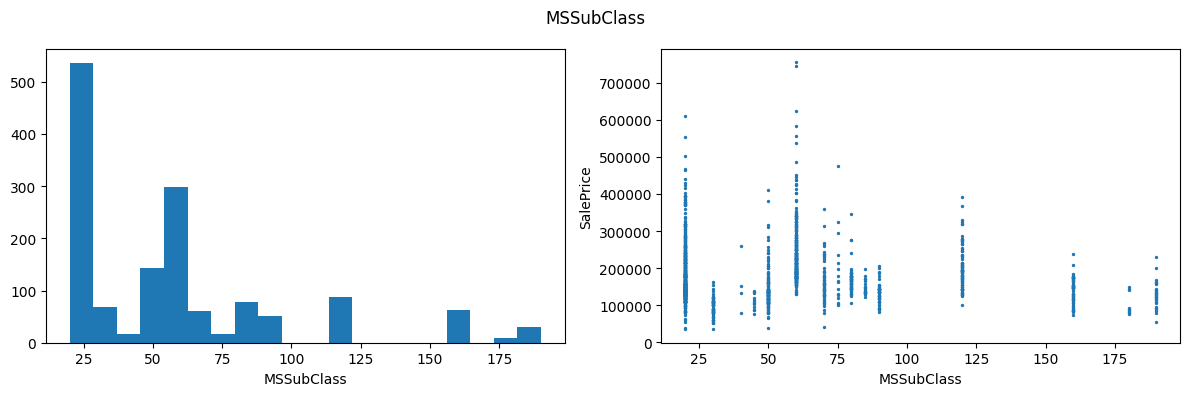







Variable: LotFrontage
n: 1201 de 1460 (82.26%)
pearson R: 0.35 (p-val=0.0000)
spearman R: 0.41 (p-val=0.0000)


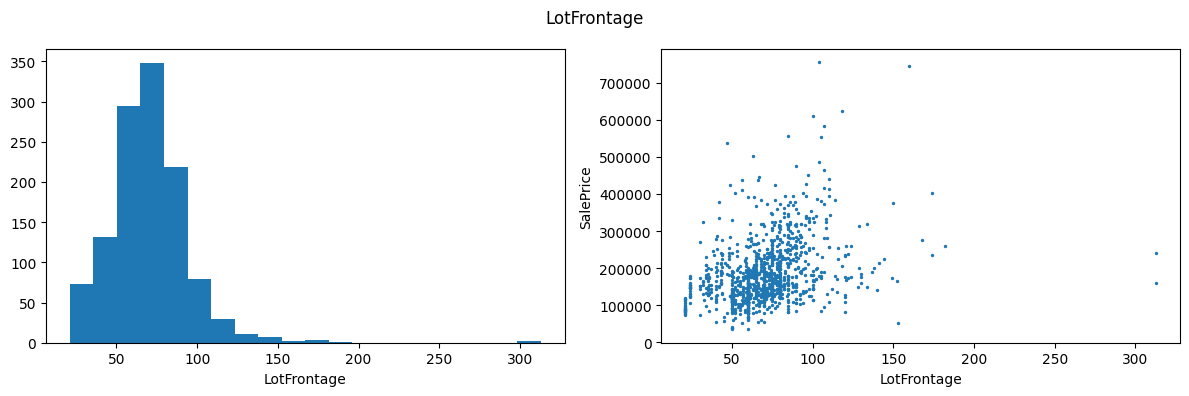







Variable: LotArea
n: 1460 de 1460 (100.00%)
pearson R: 0.26 (p-val=0.0000)
spearman R: 0.46 (p-val=0.0000)


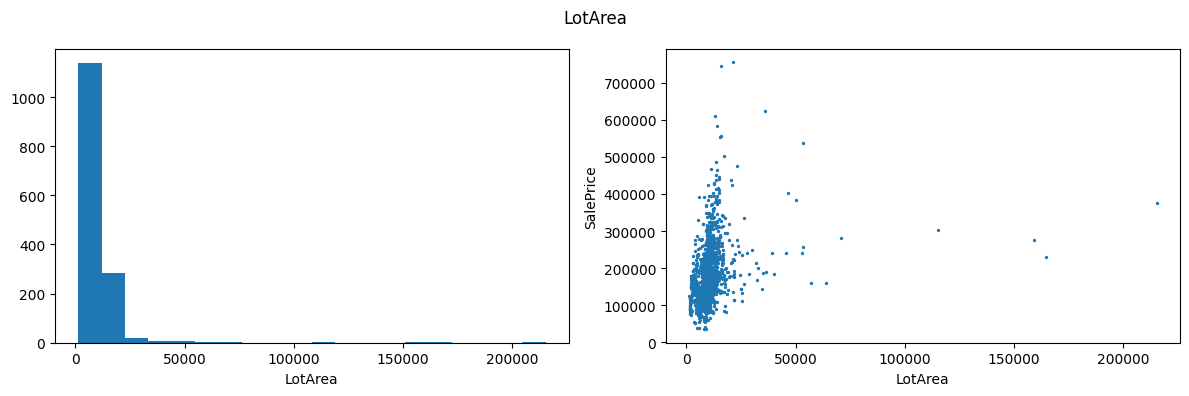







Variable: OverallQual
n: 1460 de 1460 (100.00%)
pearson R: 0.79 (p-val=0.0000)
spearman R: 0.81 (p-val=0.0000)


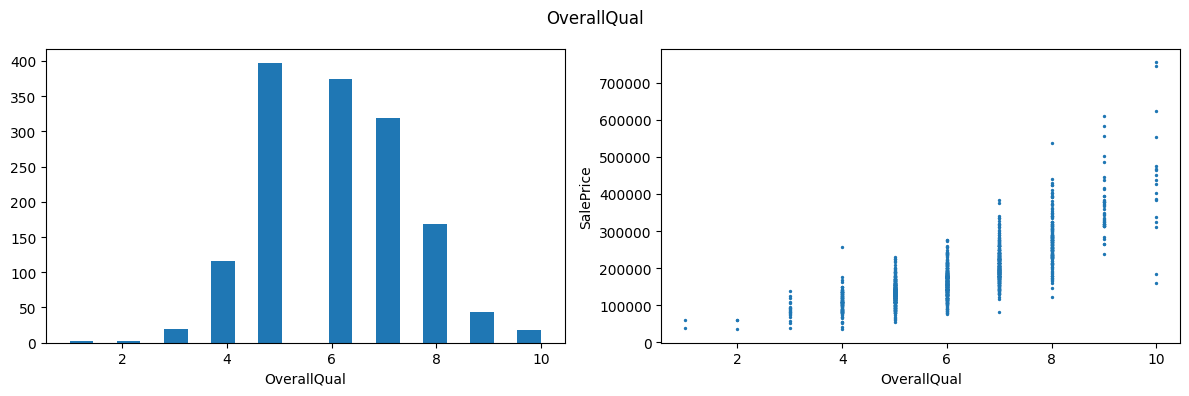







Variable: OverallCond
n: 1460 de 1460 (100.00%)
pearson R: -0.08 (p-val=0.0029)
spearman R: -0.13 (p-val=0.0000)


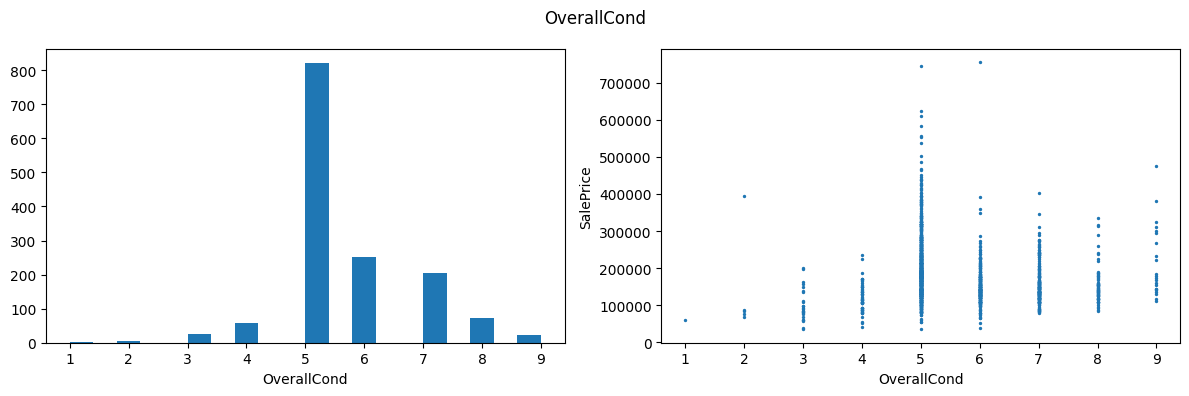







Variable: YearBuilt
n: 1460 de 1460 (100.00%)
pearson R: 0.52 (p-val=0.0000)
spearman R: 0.65 (p-val=0.0000)


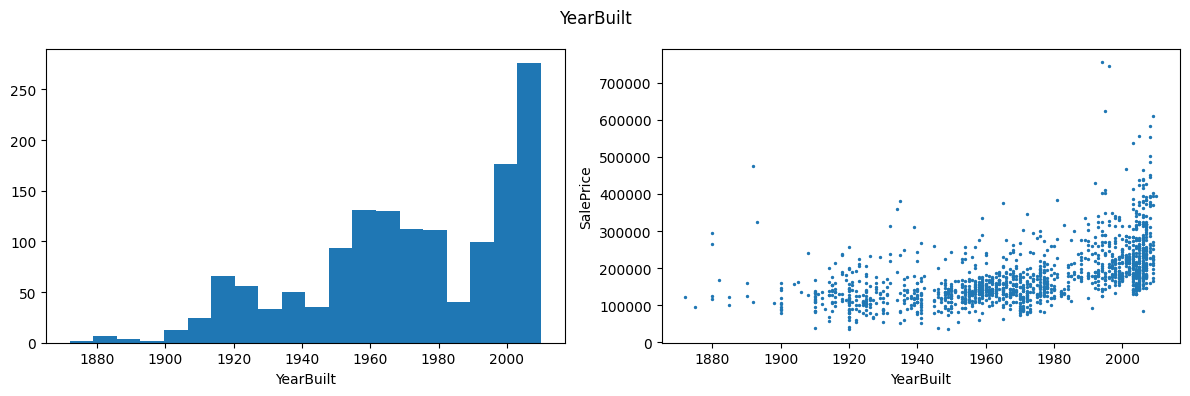







Variable: YearRemodAdd
n: 1460 de 1460 (100.00%)
pearson R: 0.51 (p-val=0.0000)
spearman R: 0.57 (p-val=0.0000)


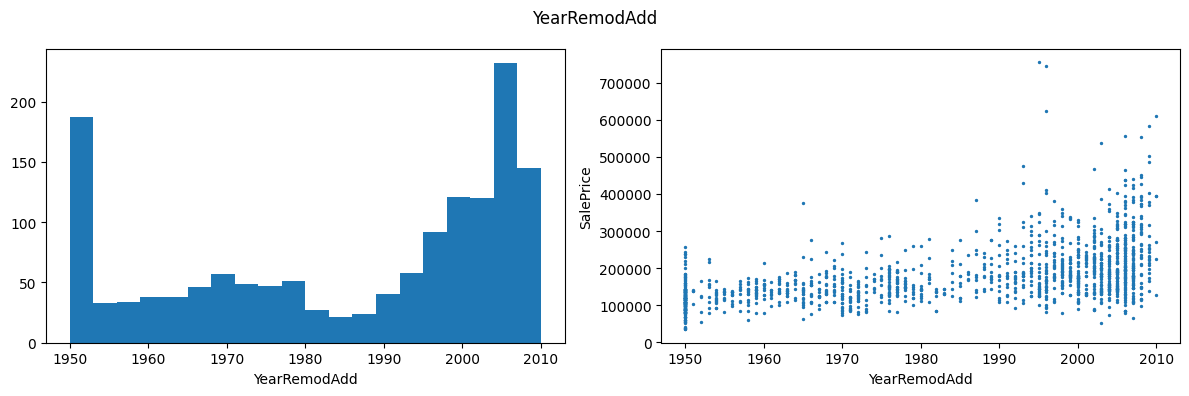







Variable: MasVnrArea
n: 1452 de 1460 (99.45%)
pearson R: 0.48 (p-val=0.0000)
spearman R: 0.42 (p-val=0.0000)


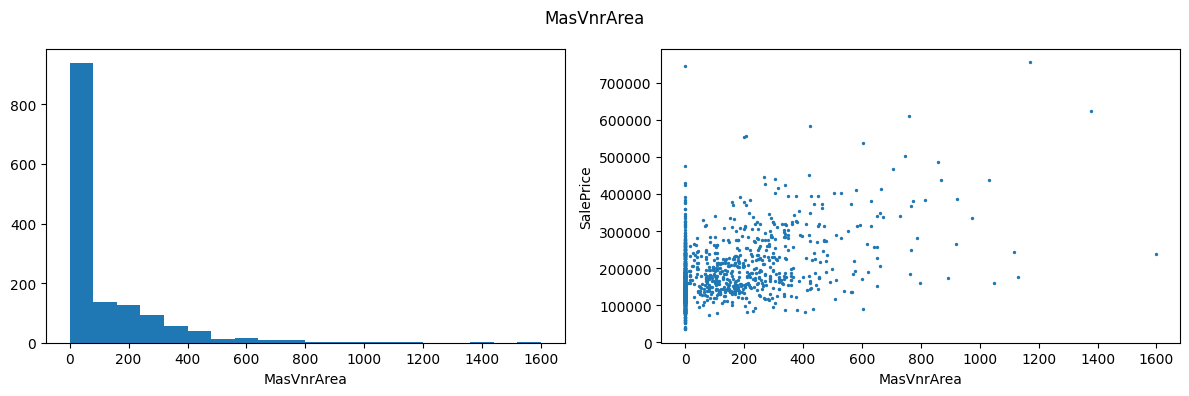







Variable: BsmtFinSF1
n: 1460 de 1460 (100.00%)
pearson R: 0.39 (p-val=0.0000)
spearman R: 0.30 (p-val=0.0000)


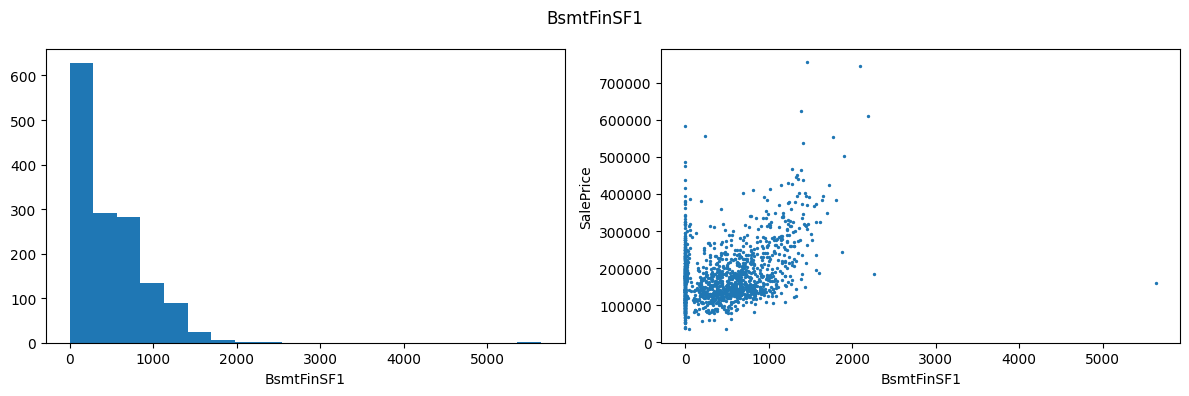







Variable: BsmtFinSF2
n: 1460 de 1460 (100.00%)
pearson R: -0.01 (p-val=0.6640)
spearman R: -0.04 (p-val=0.1383)


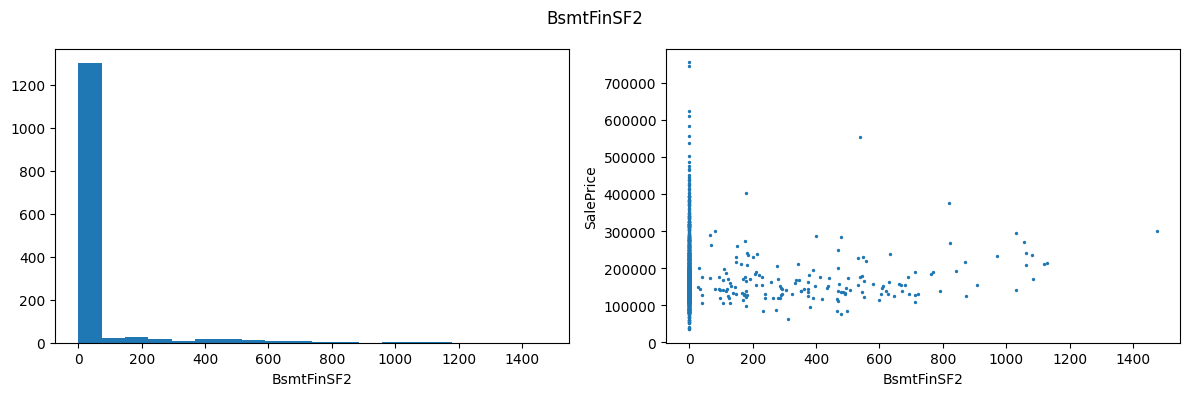







Variable: BsmtUnfSF
n: 1460 de 1460 (100.00%)
pearson R: 0.21 (p-val=0.0000)
spearman R: 0.19 (p-val=0.0000)


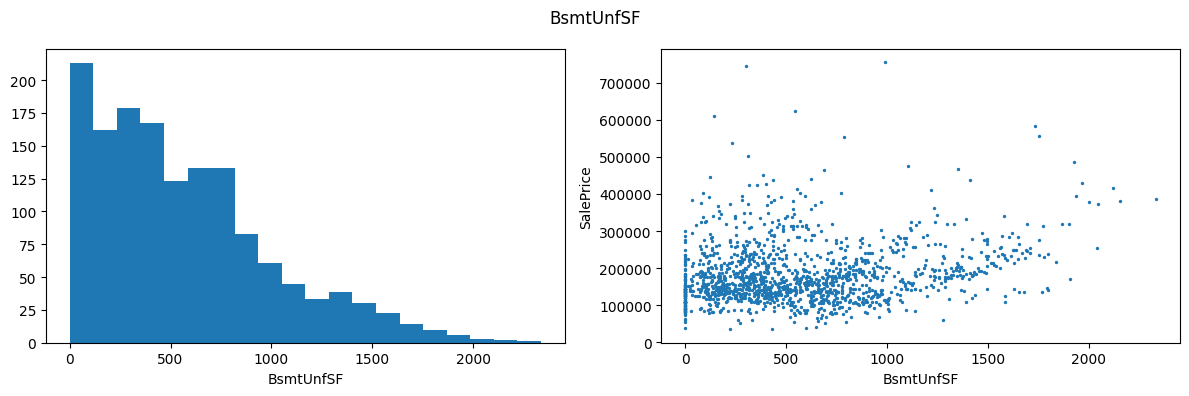







Variable: TotalBsmtSF
n: 1460 de 1460 (100.00%)
pearson R: 0.61 (p-val=0.0000)
spearman R: 0.60 (p-val=0.0000)


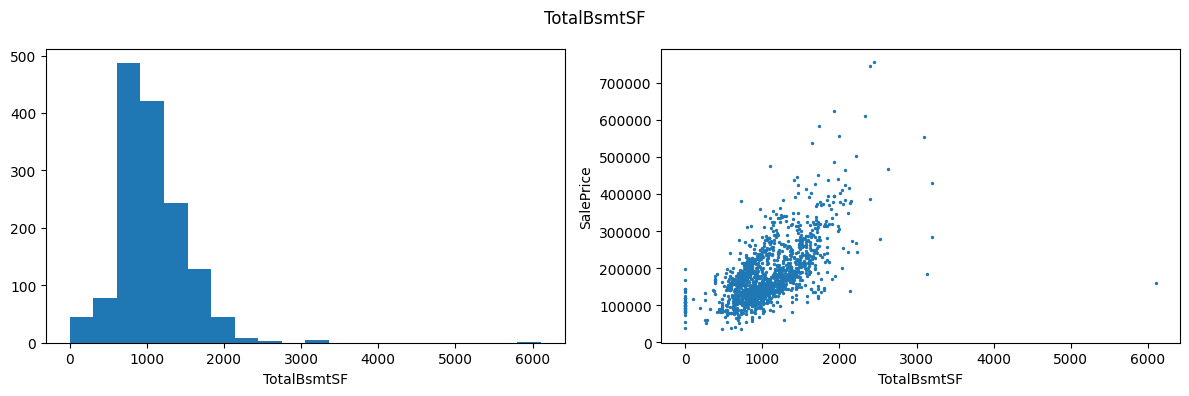







Variable: 1stFlrSF
n: 1460 de 1460 (100.00%)
pearson R: 0.61 (p-val=0.0000)
spearman R: 0.58 (p-val=0.0000)


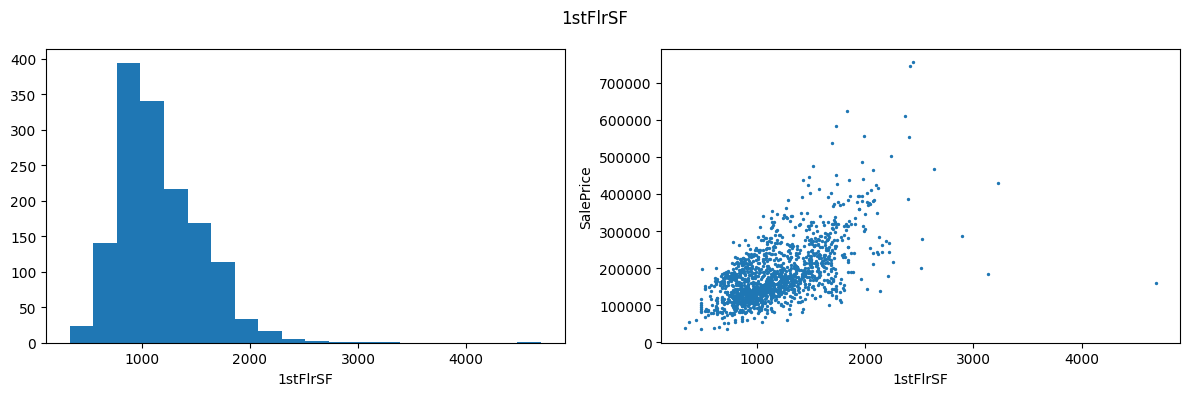







Variable: 2ndFlrSF
n: 1460 de 1460 (100.00%)
pearson R: 0.32 (p-val=0.0000)
spearman R: 0.29 (p-val=0.0000)


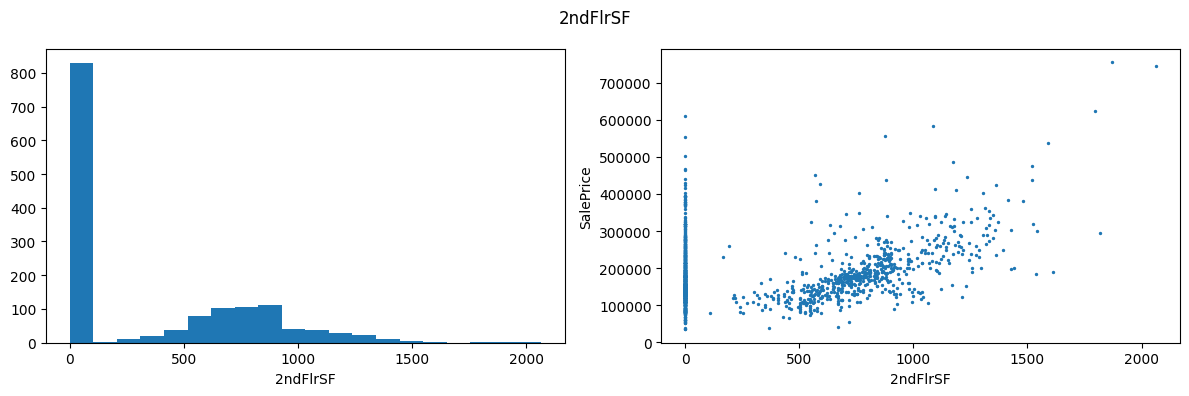







Variable: LowQualFinSF
n: 1460 de 1460 (100.00%)
pearson R: -0.03 (p-val=0.3282)
spearman R: -0.07 (p-val=0.0096)


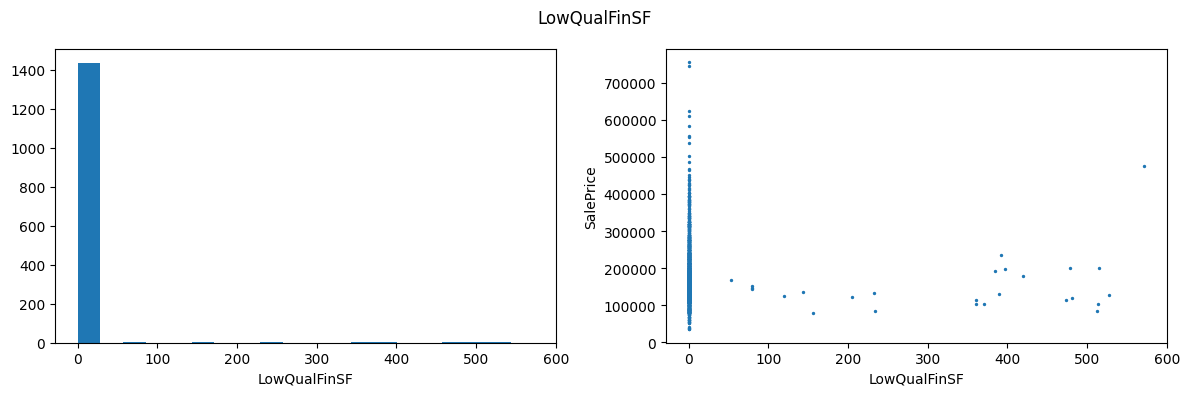







Variable: GrLivArea
n: 1460 de 1460 (100.00%)
pearson R: 0.71 (p-val=0.0000)
spearman R: 0.73 (p-val=0.0000)


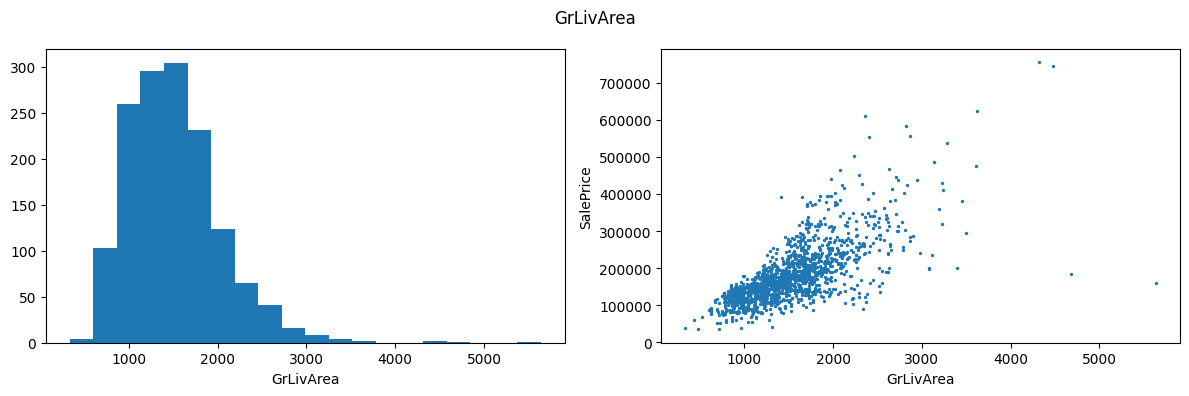







Variable: BsmtFullBath
n: 1460 de 1460 (100.00%)
pearson R: 0.23 (p-val=0.0000)
spearman R: 0.23 (p-val=0.0000)


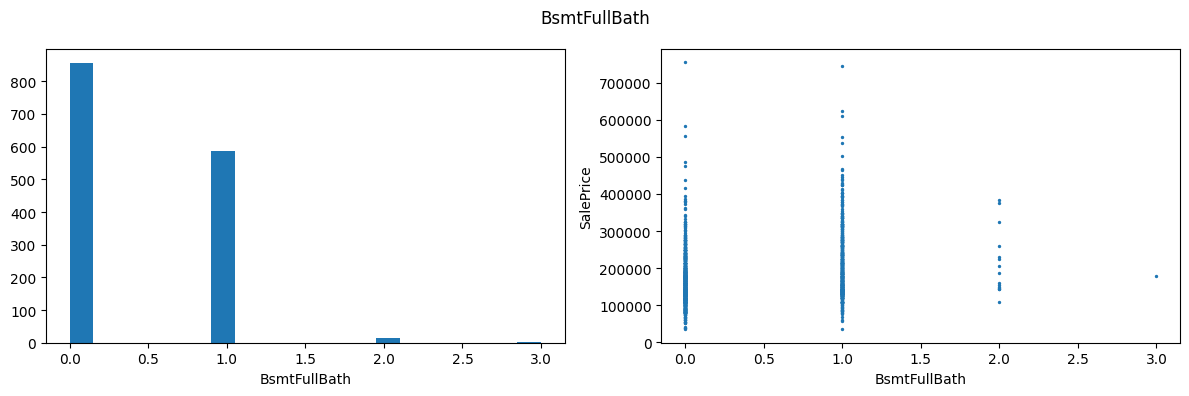







Variable: BsmtHalfBath
n: 1460 de 1460 (100.00%)
pearson R: -0.02 (p-val=0.5202)
spearman R: -0.01 (p-val=0.6417)


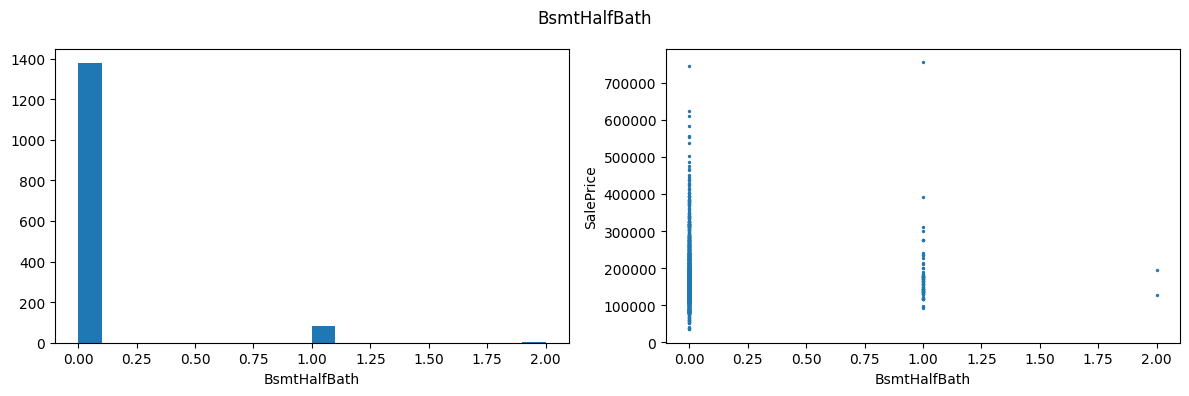







Variable: FullBath
n: 1460 de 1460 (100.00%)
pearson R: 0.56 (p-val=0.0000)
spearman R: 0.64 (p-val=0.0000)


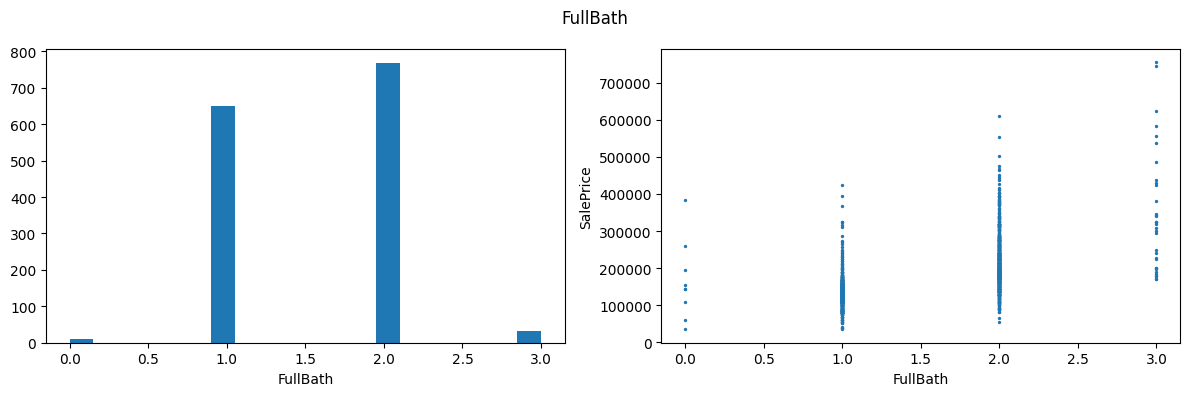







Variable: HalfBath
n: 1460 de 1460 (100.00%)
pearson R: 0.28 (p-val=0.0000)
spearman R: 0.34 (p-val=0.0000)


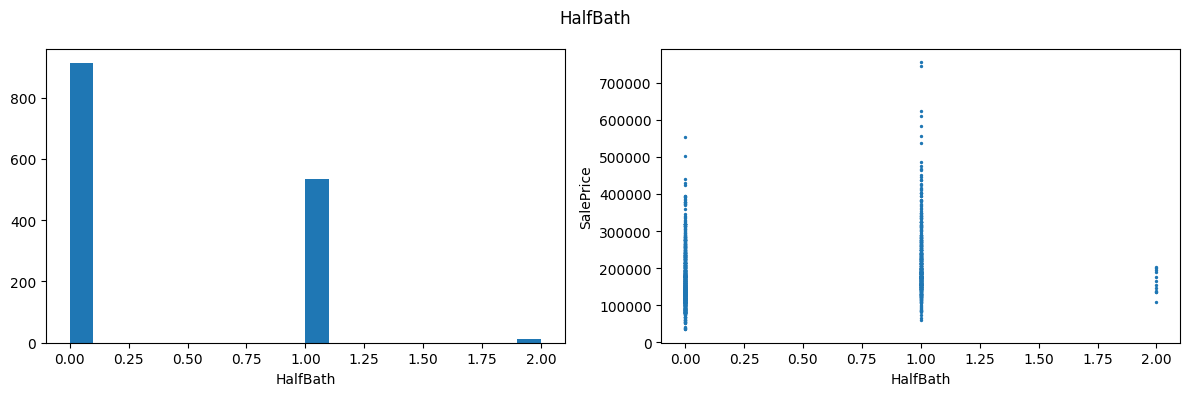







Variable: BedroomAbvGr
n: 1460 de 1460 (100.00%)
pearson R: 0.17 (p-val=0.0000)
spearman R: 0.23 (p-val=0.0000)


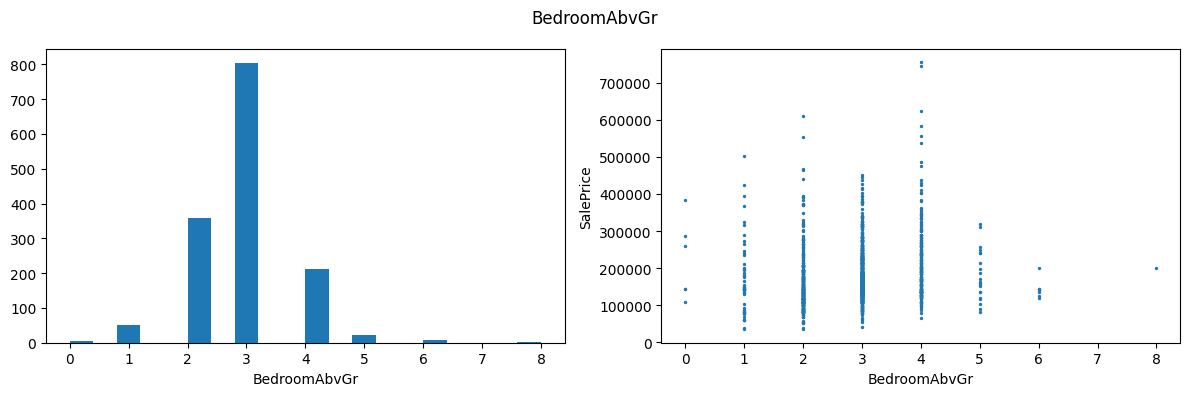







Variable: KitchenAbvGr
n: 1460 de 1460 (100.00%)
pearson R: -0.14 (p-val=0.0000)
spearman R: -0.16 (p-val=0.0000)


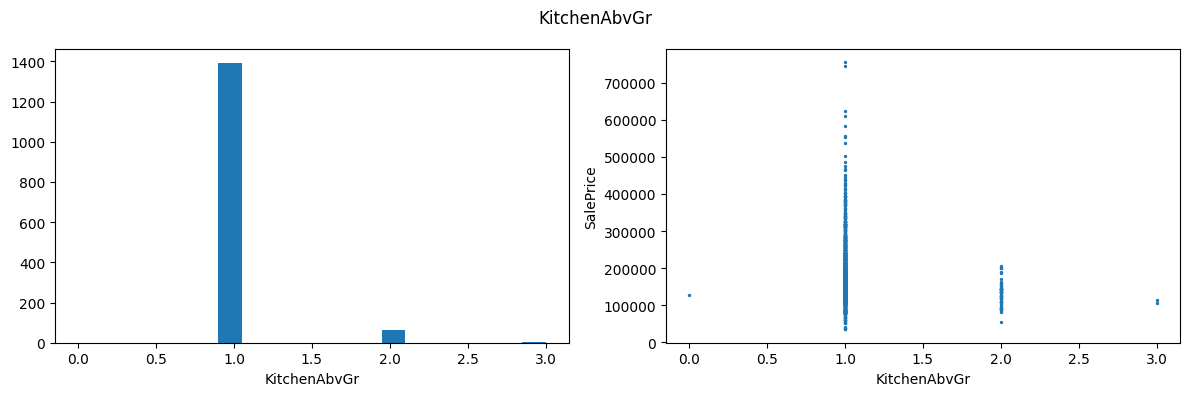







Variable: TotRmsAbvGrd
n: 1460 de 1460 (100.00%)
pearson R: 0.53 (p-val=0.0000)
spearman R: 0.53 (p-val=0.0000)


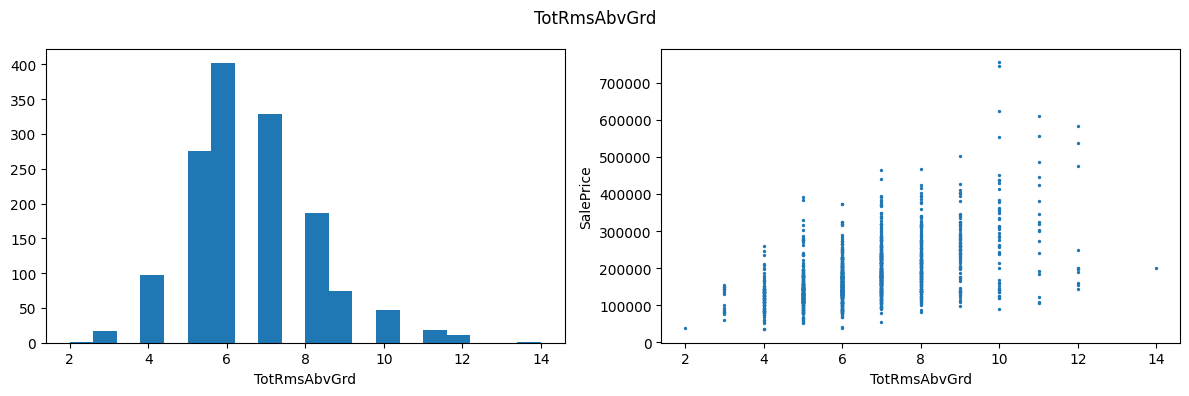







Variable: Fireplaces
n: 1460 de 1460 (100.00%)
pearson R: 0.47 (p-val=0.0000)
spearman R: 0.52 (p-val=0.0000)


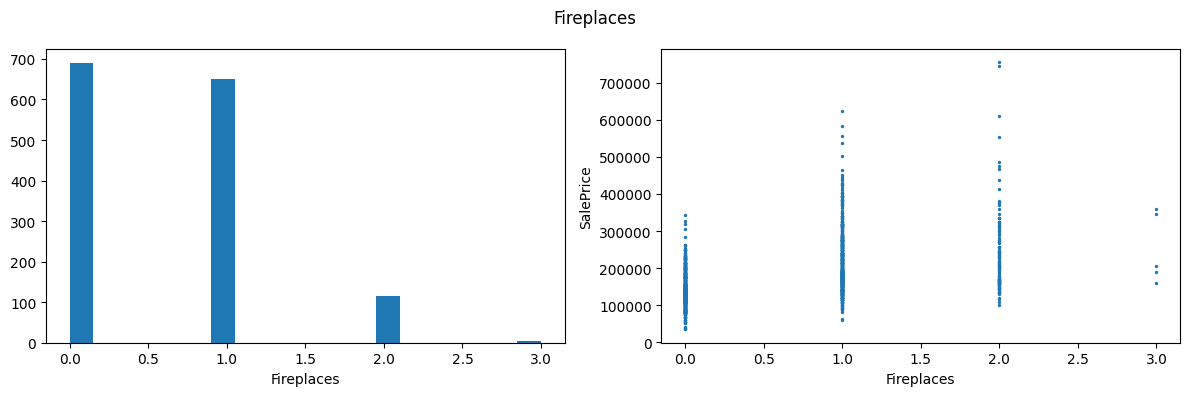







Variable: GarageYrBlt
n: 1379 de 1460 (94.45%)
pearson R: 0.49 (p-val=0.0000)
spearman R: 0.59 (p-val=0.0000)


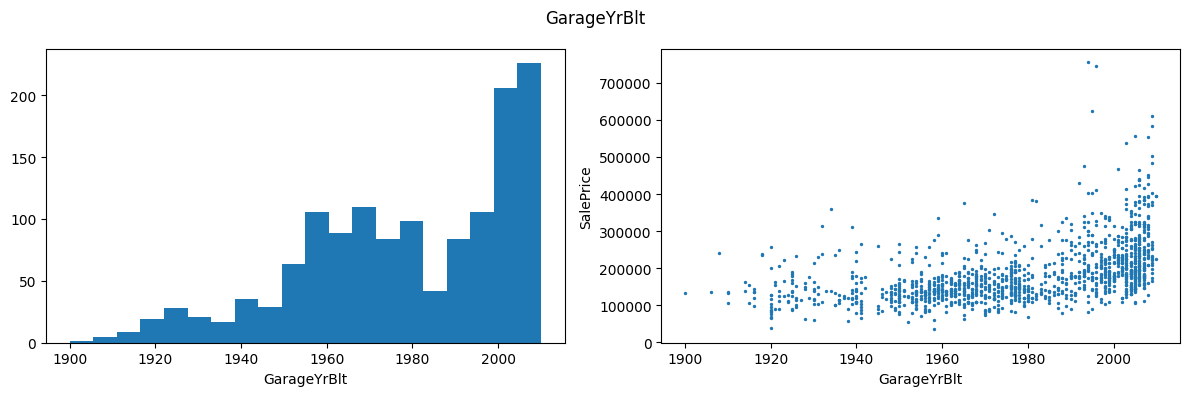







Variable: GarageCars
n: 1460 de 1460 (100.00%)
pearson R: 0.64 (p-val=0.0000)
spearman R: 0.69 (p-val=0.0000)


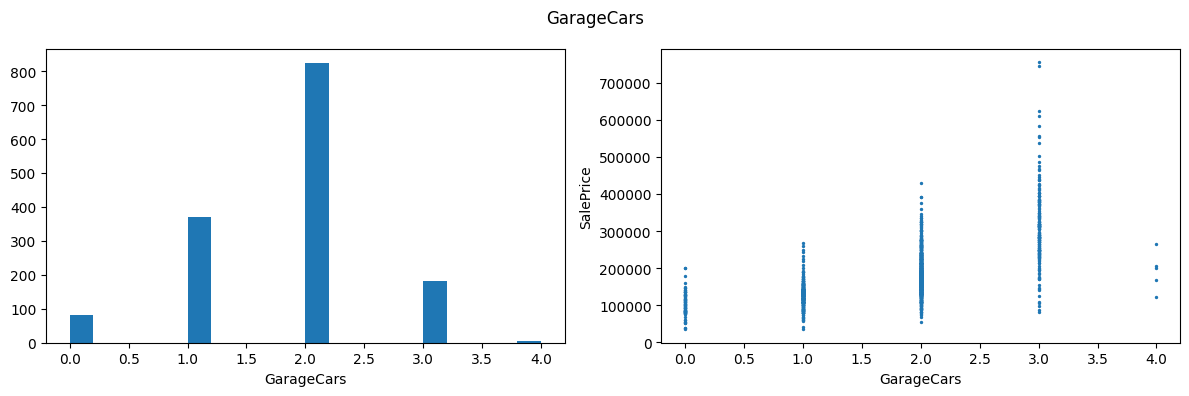







Variable: GarageArea
n: 1460 de 1460 (100.00%)
pearson R: 0.62 (p-val=0.0000)
spearman R: 0.65 (p-val=0.0000)


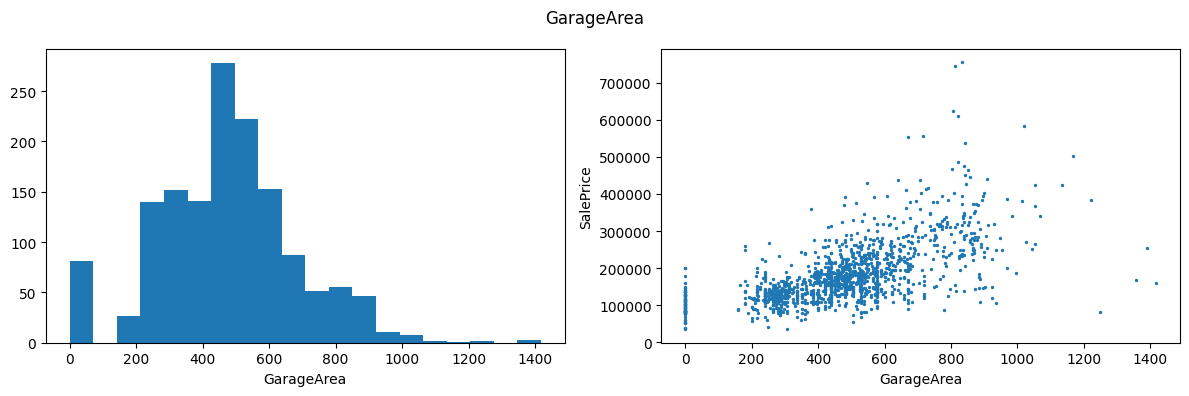







Variable: WoodDeckSF
n: 1460 de 1460 (100.00%)
pearson R: 0.32 (p-val=0.0000)
spearman R: 0.35 (p-val=0.0000)


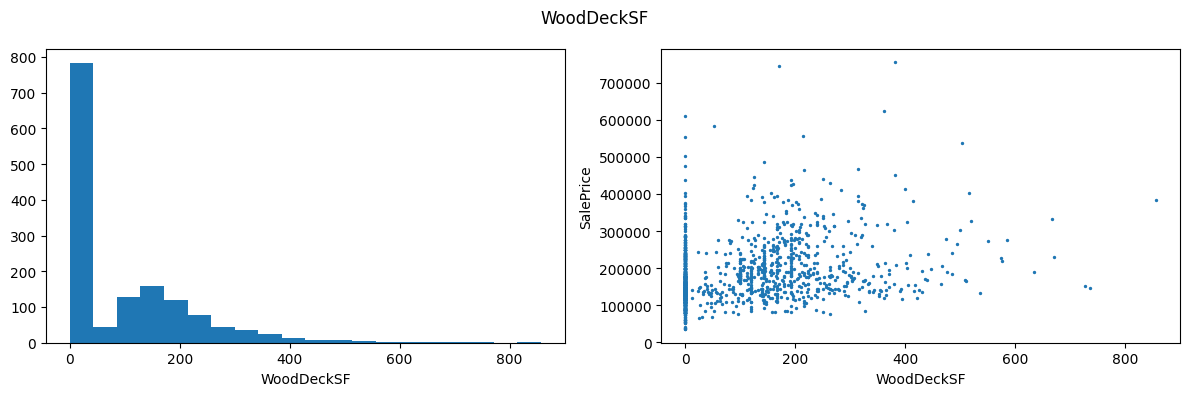







Variable: OpenPorchSF
n: 1460 de 1460 (100.00%)
pearson R: 0.32 (p-val=0.0000)
spearman R: 0.48 (p-val=0.0000)


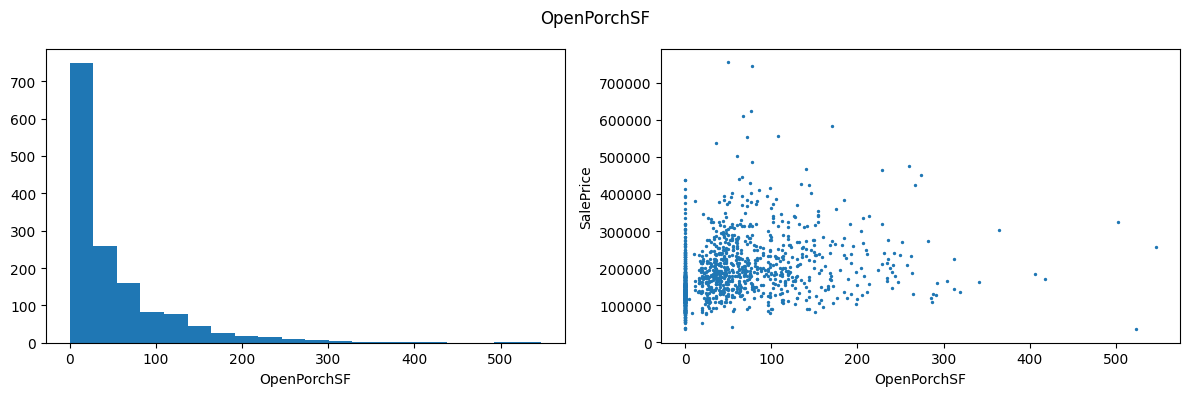







Variable: EnclosedPorch
n: 1460 de 1460 (100.00%)
pearson R: -0.13 (p-val=0.0000)
spearman R: -0.22 (p-val=0.0000)


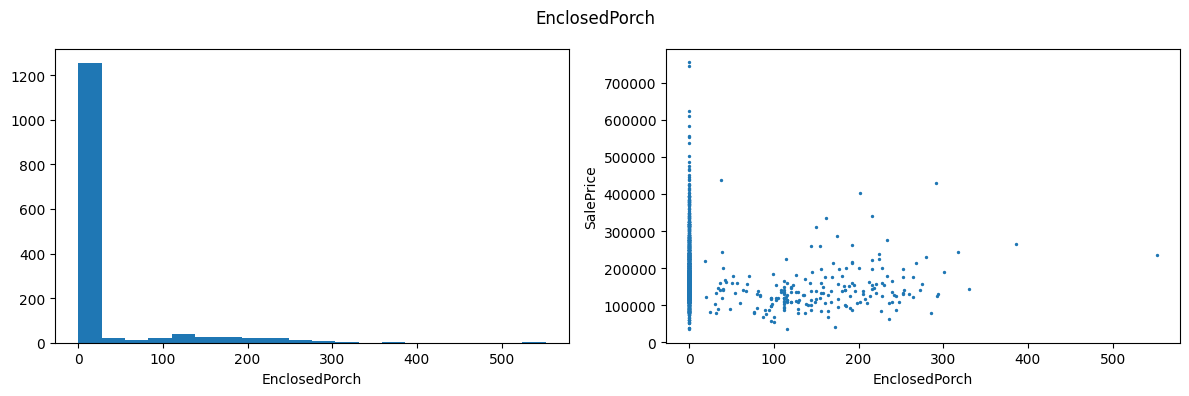







Variable: 3SsnPorch
n: 1460 de 1460 (100.00%)
pearson R: 0.04 (p-val=0.0886)
spearman R: 0.07 (p-val=0.0124)


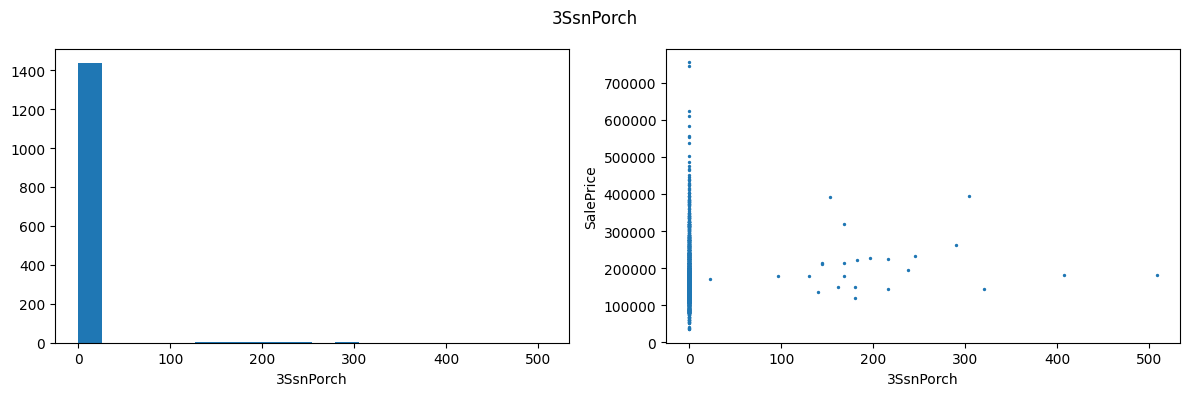







Variable: ScreenPorch
n: 1460 de 1460 (100.00%)
pearson R: 0.11 (p-val=0.0000)
spearman R: 0.10 (p-val=0.0001)


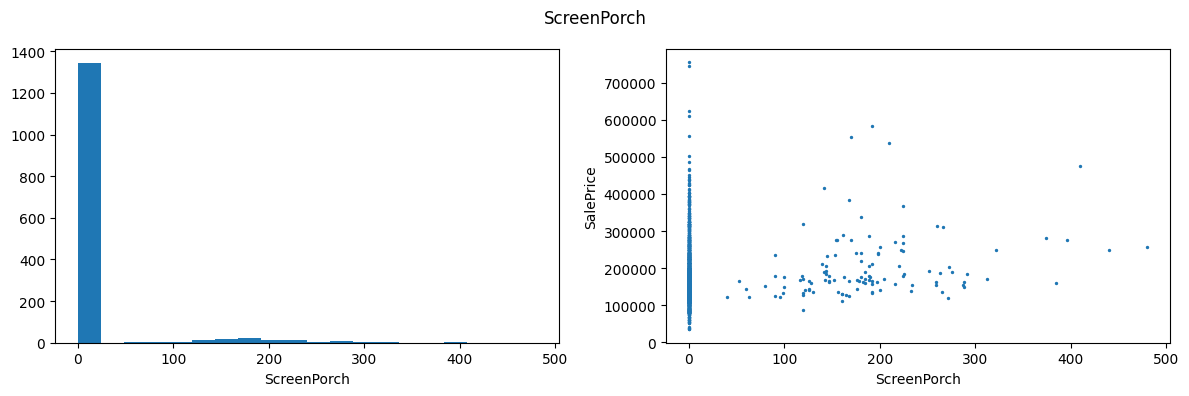







Variable: PoolArea
n: 1460 de 1460 (100.00%)
pearson R: 0.09 (p-val=0.0004)
spearman R: 0.06 (p-val=0.0255)


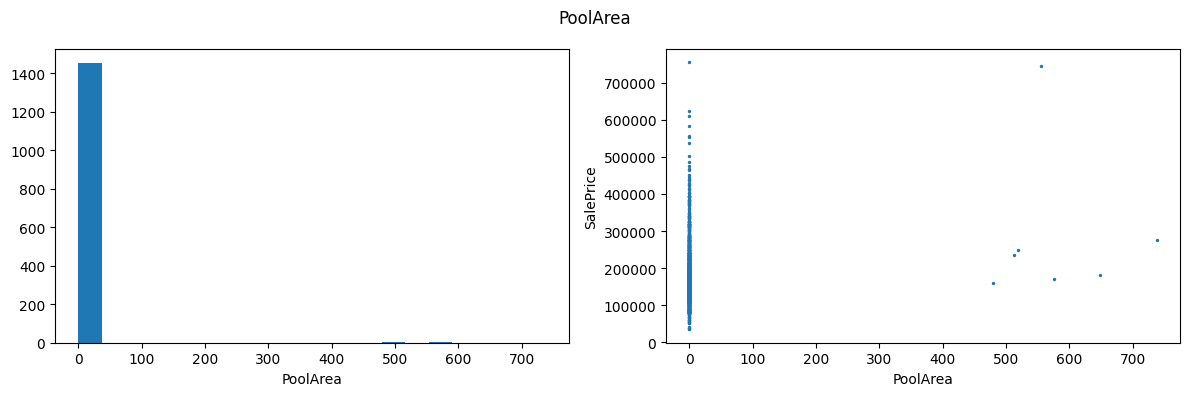







Variable: MiscVal
n: 1460 de 1460 (100.00%)
pearson R: -0.02 (p-val=0.4185)
spearman R: -0.06 (p-val=0.0165)


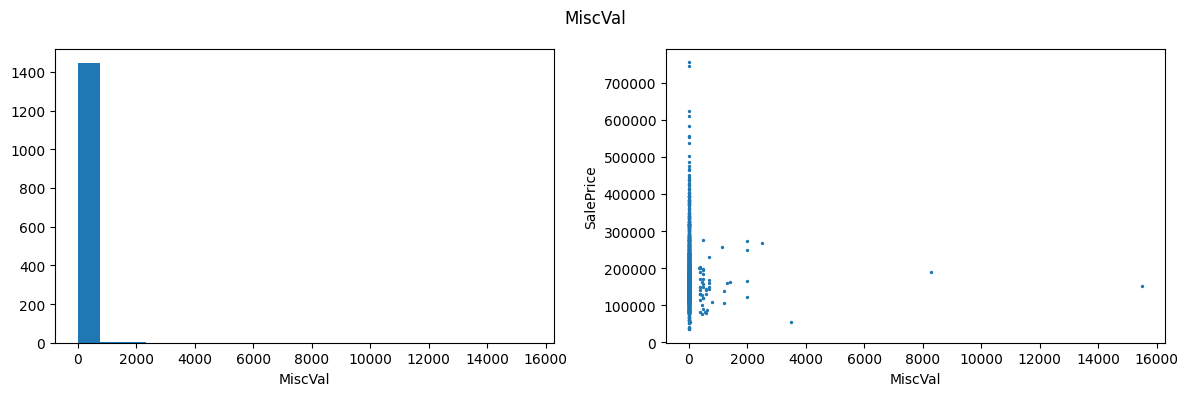







Variable: MoSold
n: 1460 de 1460 (100.00%)
pearson R: 0.05 (p-val=0.0761)
spearman R: 0.07 (p-val=0.0080)


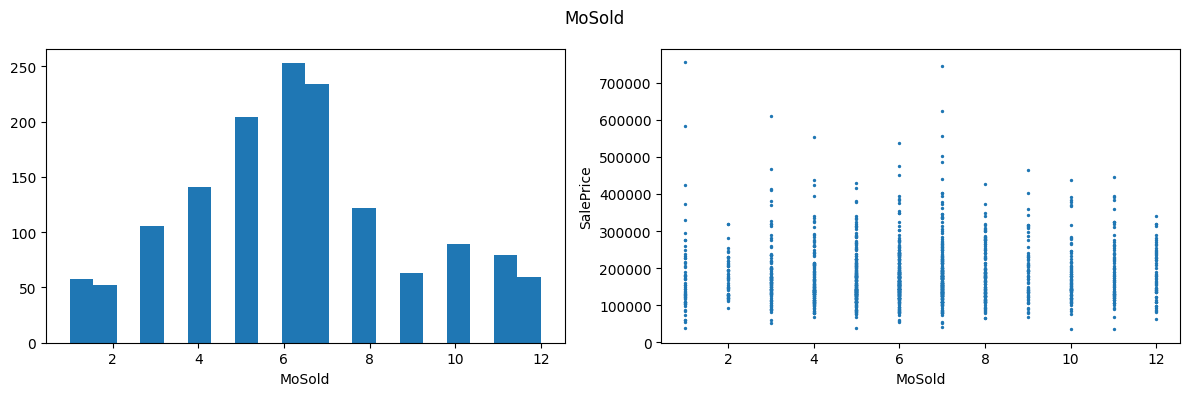







Variable: YrSold
n: 1460 de 1460 (100.00%)
pearson R: -0.03 (p-val=0.2694)
spearman R: -0.03 (p-val=0.2536)


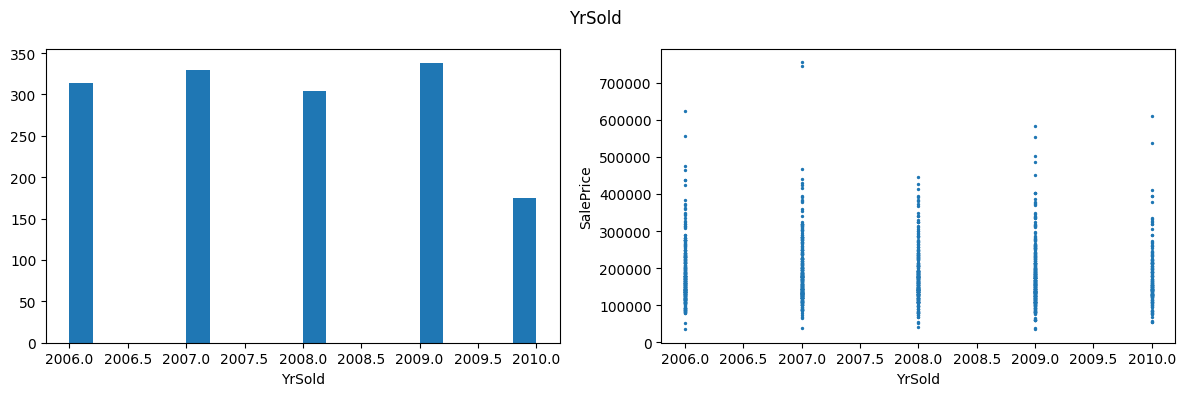

In [ ]:
# REPRESENTACIÓN GRÁFICA de variables NUMÉRICAS

# Identificación de columnas numéricas
columnas_numericas = data.columns[data.dtypes != "object"].drop(["Id", "SalePrice"])

# Definición de variable de interacción
resp_col = "SalePrice"
y = data[resp_col]

# Para cada variable numérica...
for col in columnas_numericas:

    # Determinar datos en los que centrarnos
    x = data[col]
    nonnull_vals = ~x.isna()

    x_to_plot = x[nonnull_vals]
    y_to_plot = y[nonnull_vals]

    # Ejecutar tests y calcular correlaciones
    pearson_r, pearson_p_val = stats.pearsonr(x_to_plot, y_to_plot)
    spearman_r, spearman_p_val = stats.spearmanr(x_to_plot, y_to_plot)

    # Imprimir datos de inferencia
    print(f"Variable: {col}")
    print(f"n: {nonnull_vals.sum()} de {len(x)} ({nonnull_vals.sum()*100/len(x):2.2f}%)")
    print(f"pearson R: {pearson_r:.2f} (p-val={pearson_p_val:.4f})")
    print(f"spearman R: {spearman_r:.2f} (p-val={spearman_p_val:.4f})")

    # Generar interfaz para dos gráficas
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(col)

    # Dibujar a la izquierda el histograma con la distribución de la variable
    axs[0].hist(x, bins=20)
    axs[0].set_xlabel(col)

    # Dibujar a la derecha el diagrama de dispersión con la interacción entre variable de interés y variable respuesta
    axs[1].scatter(x, y, s=2)
    axs[1].set_xlabel(col)
    axs[1].set_ylabel(resp_col)

    # Mostrar visualización
    fig.tight_layout()
    fig.subplots_adjust(top=0.88)
    plt.show()

    print("\n\n\n\n\n")


    # plt.figure()
    # plt.title(col)

    # Dibujar el diagrama de dispersión con la interacción entre variable de interés y variable respuesta
    # plt.scatter(x_to_plot,y_to_plot, s=2)
    # plt.xlabel(col)
    # plt.ylabel("SalePrice")

    # Dibujar recta de ajuste
    # (m, b) = np.polyfit(x_to_plot,y_to_plot, 1)
    # y_fitted = np.polyval([m, b], x_to_plot)
    # plt.plot(x_to_plot, y_fitted, c='r',  linewidth=0.5)

    # Mostrar visualización
    # plt.show()

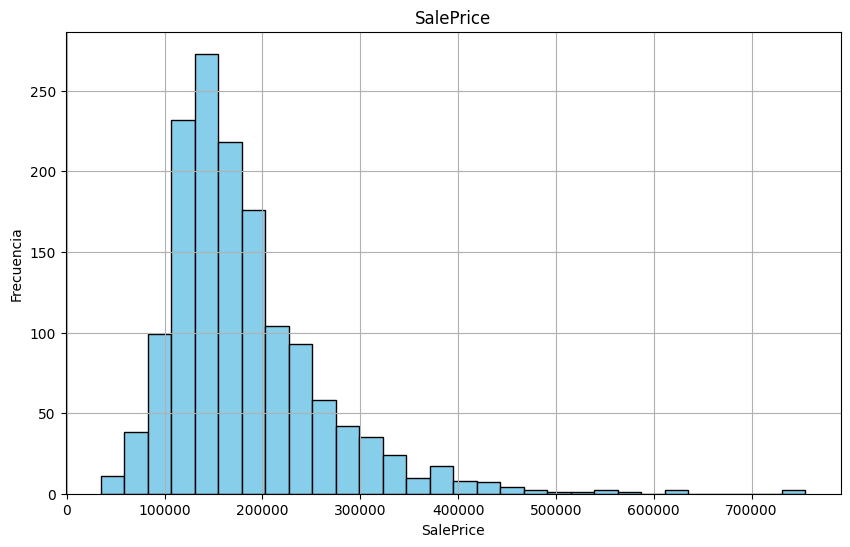

In [ ]:
plt.figure(figsize=(10, 6))  # Establecer el tamaño de la figura
plt.hist(data['SalePrice'], bins=30, color='skyblue', edgecolor='black')  # Crear un histograma
plt.title('SalePrice')  # Agregar un título al gráfico
plt.xlabel('SalePrice')  # Etiqueta del eje X
plt.ylabel('Frecuencia')  # Etiqueta del eje Y
plt.grid(True)  # Agregar una cuadrícula al gráfico

## Variables categóricas
Análisis masivo

In [ ]:
# Identificar columnas categóricas
columnas_categoricas = data.columns[data.dtypes == "object"]

# Definir función para determinar test a aplicar
def ejecutar_test_segun_num_cats(df, x_col, y_col):
    """Función para determinar qué test aplicar según el número de niveles en una categoría.
       Input:
       - df (pandas dataframe): tabla con todos los registros. Contendrá dos columnas: categorías y métrica
       - x_col (string): nombre del campo correspondiente a categorías
       - y_col (string): nombre del campo que corresponde a la métrica a medir

       Output:
       - test (string): nombre del test aplicado
       - statistic (string): cadena indicando qué valor se mide (según test) y el valor obtenido
       - p-val (float): p-valor obtenido
    """

    # Eliminar "nans" del campo de categorías
    reduced_df = df[df[x_col].notnull()][[x_col, y_col]]

    #obtener número de categorías únicas
    categorias = reduced_df[col].unique()
    num_categorias = len(categorias)

    # definir test
    if num_categorias==1:
        # con una sola categoría, se aplicará un test-t para una muestra
        test = "one-sample t-test"
        statistic, p_val = stats.ttest_1samp(reduced_df[y_col], 0)
        statistic_text = f"Estadístico T: {statistic:0.4f}"
    elif num_categorias==2:
        # con dos categorías, se aplicará un test-t para dos muestras independientes
        test = "two-sample t-test"
        a = data[data[col]==categorias[0]][y_col]
        b = data[data[col]==categorias[1]][y_col]
        statistic, p_val = stats.ttest_ind(a, b)
        statistic_text = f"Estadístico T: {statistic:0.4f}"
    else:
        # con más de 2 categorías, se aplicará un test ANOVA
        test = "ANOVA"
        values_array = [data[data[col]==cat][y_col] for cat in categorias]
        statistic, p_val = stats.f_oneway(*values_array)
        statistic_text = f"Estadístico F: {statistic:0.4f}"

    return test, statistic_text, p_val





Variable: MSZoning
n: 1460 de 1460 (100.00%)
test aplicado: ANOVA
Estadístico F: 43.8403 (p-val=0.0000)


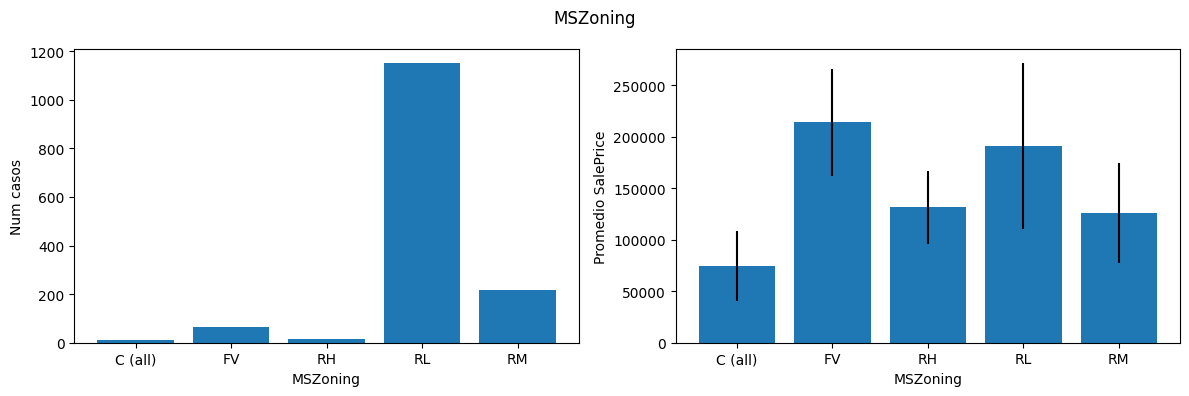





Variable: Street
n: 1460 de 1460 (100.00%)
test aplicado: two-sample t-test
Estadístico T: 1.5682 (p-val=0.1170)


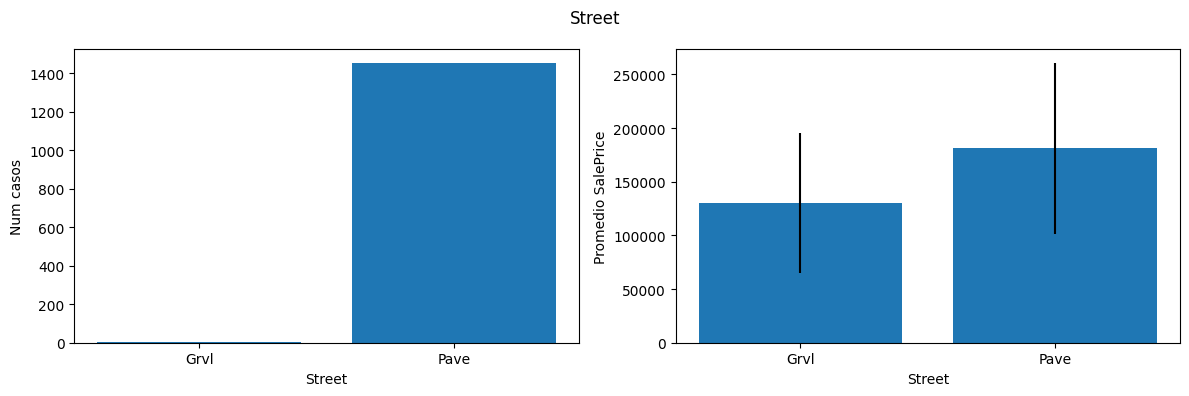





Variable: Alley
n: 91 de 1460 (6.23%)
test aplicado: two-sample t-test
Estadístico T: -5.9634 (p-val=0.0000)


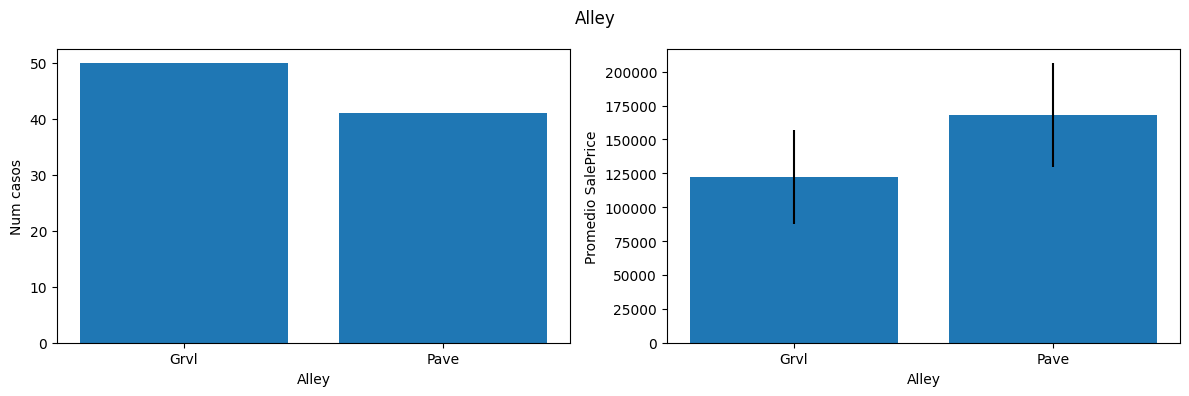





Variable: LotShape
n: 1460 de 1460 (100.00%)
test aplicado: ANOVA
Estadístico F: 40.1329 (p-val=0.0000)


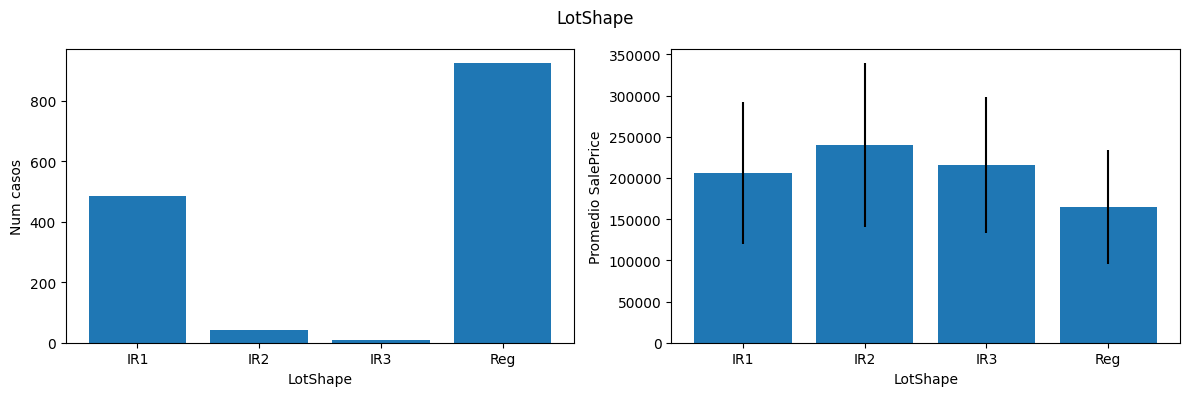





Variable: LandContour
n: 1460 de 1460 (100.00%)
test aplicado: ANOVA
Estadístico F: 12.8502 (p-val=0.0000)


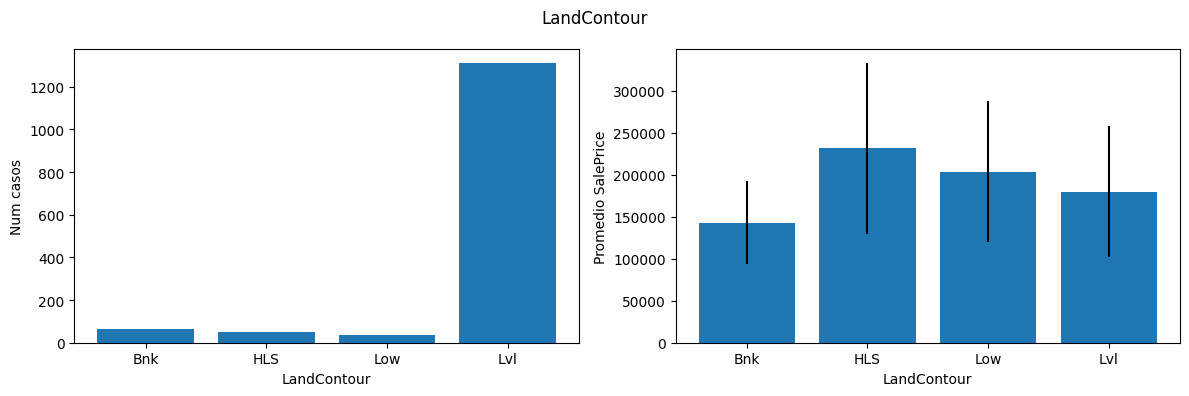





Variable: Utilities
n: 1460 de 1460 (100.00%)
test aplicado: two-sample t-test
Estadístico T: 0.5466 (p-val=0.5847)


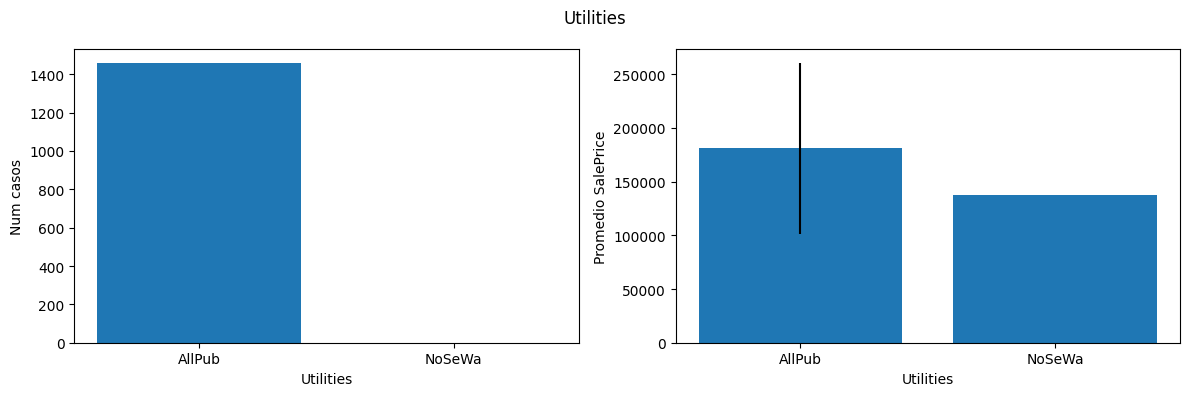





Variable: LotConfig
n: 1460 de 1460 (100.00%)
test aplicado: ANOVA
Estadístico F: 7.8100 (p-val=0.0000)


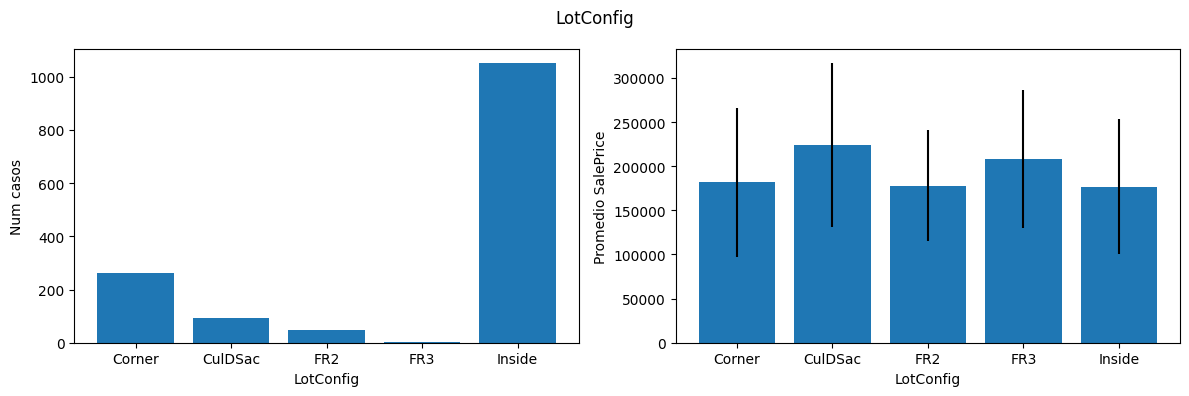





Variable: LandSlope
n: 1460 de 1460 (100.00%)
test aplicado: ANOVA
Estadístico F: 1.9588 (p-val=0.1414)


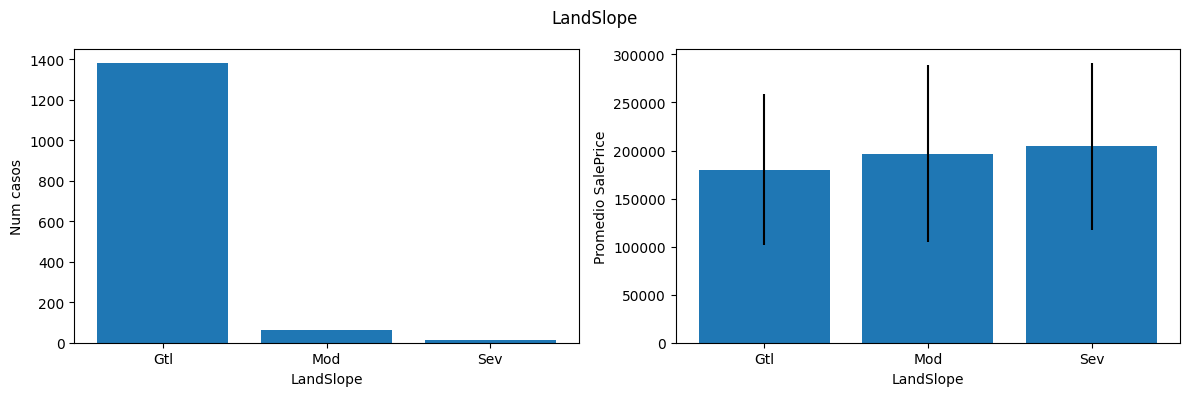





Variable: Neighborhood
n: 1460 de 1460 (100.00%)
test aplicado: ANOVA
Estadístico F: 71.7849 (p-val=0.0000)


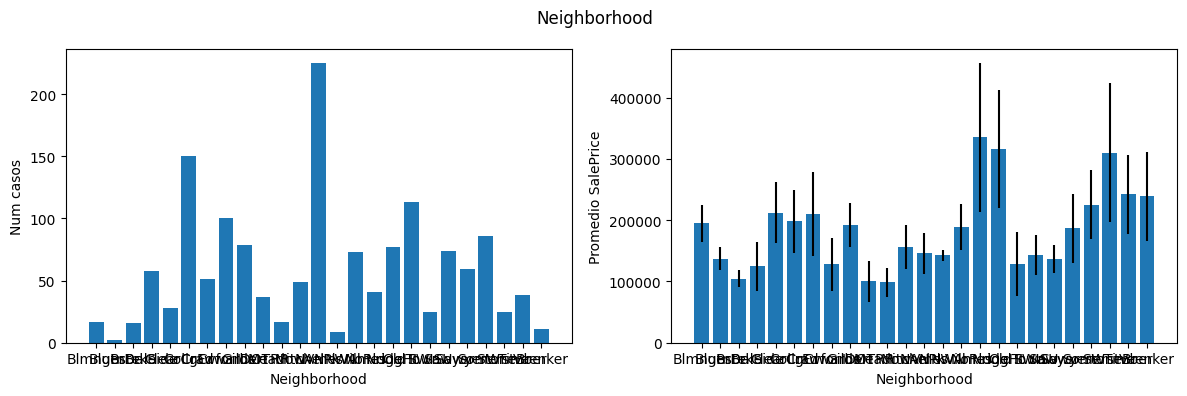





Variable: Condition1
n: 1460 de 1460 (100.00%)
test aplicado: ANOVA
Estadístico F: 6.1180 (p-val=0.0000)


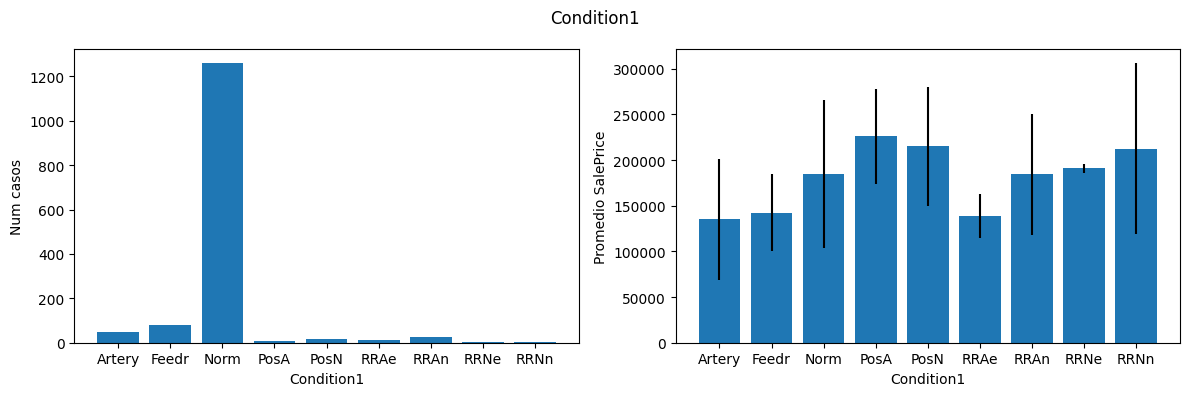





Variable: Condition2
n: 1460 de 1460 (100.00%)
test aplicado: ANOVA
Estadístico F: 2.0739 (p-val=0.0434)


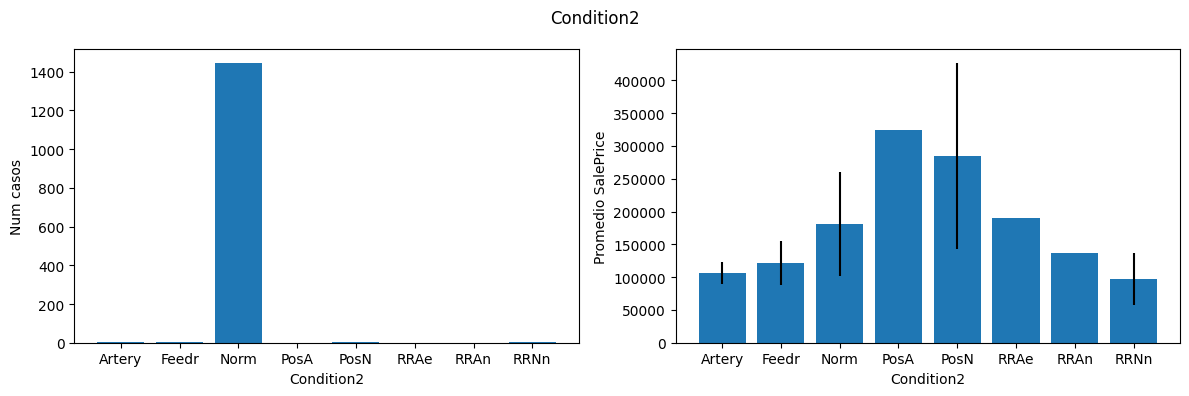





Variable: BldgType
n: 1460 de 1460 (100.00%)
test aplicado: ANOVA
Estadístico F: 13.0111 (p-val=0.0000)


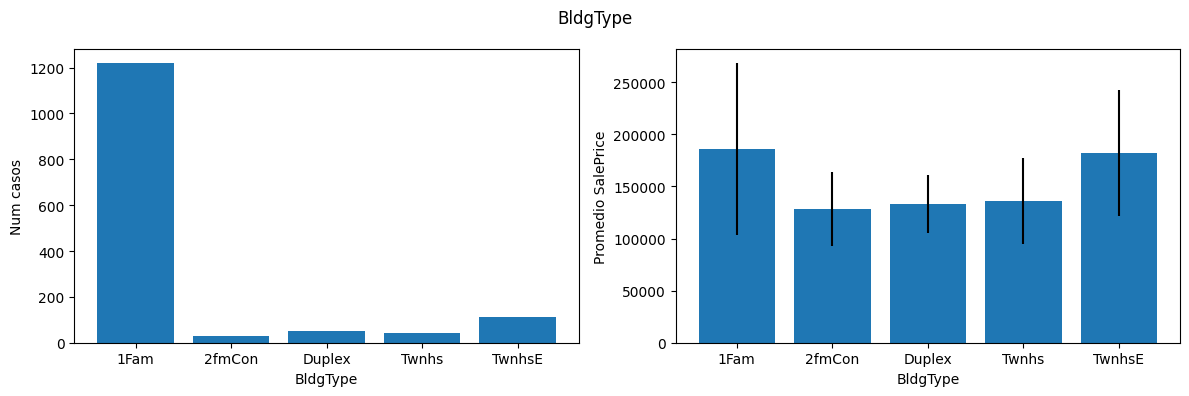





Variable: HouseStyle
n: 1460 de 1460 (100.00%)
test aplicado: ANOVA
Estadístico F: 19.5950 (p-val=0.0000)


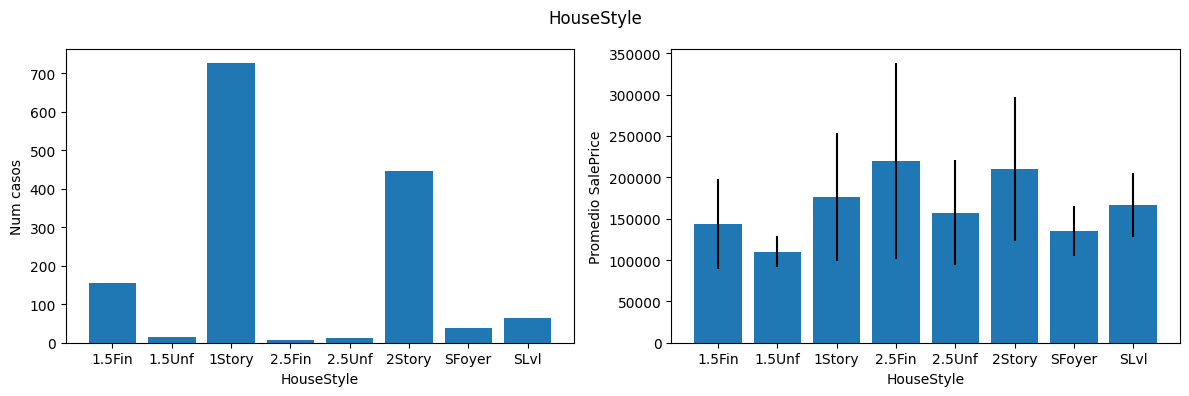





Variable: RoofStyle
n: 1460 de 1460 (100.00%)
test aplicado: ANOVA
Estadístico F: 17.8055 (p-val=0.0000)


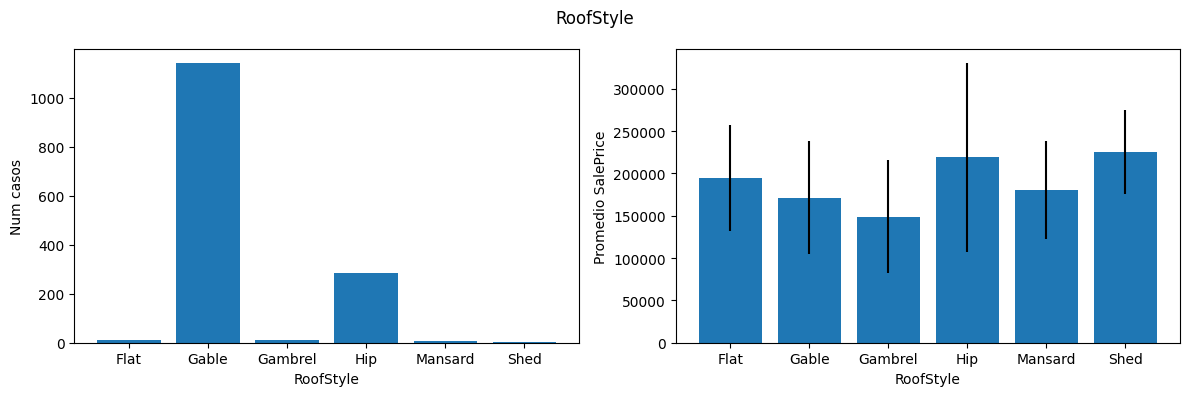





Variable: RoofMatl
n: 1460 de 1460 (100.00%)
test aplicado: ANOVA
Estadístico F: 6.7273 (p-val=0.0000)


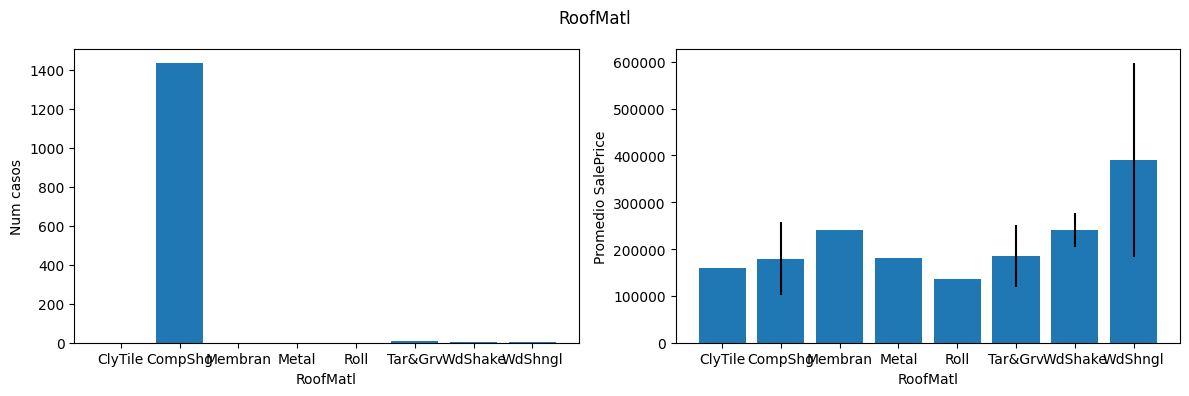





Variable: Exterior1st
n: 1460 de 1460 (100.00%)
test aplicado: ANOVA
Estadístico F: 18.6117 (p-val=0.0000)


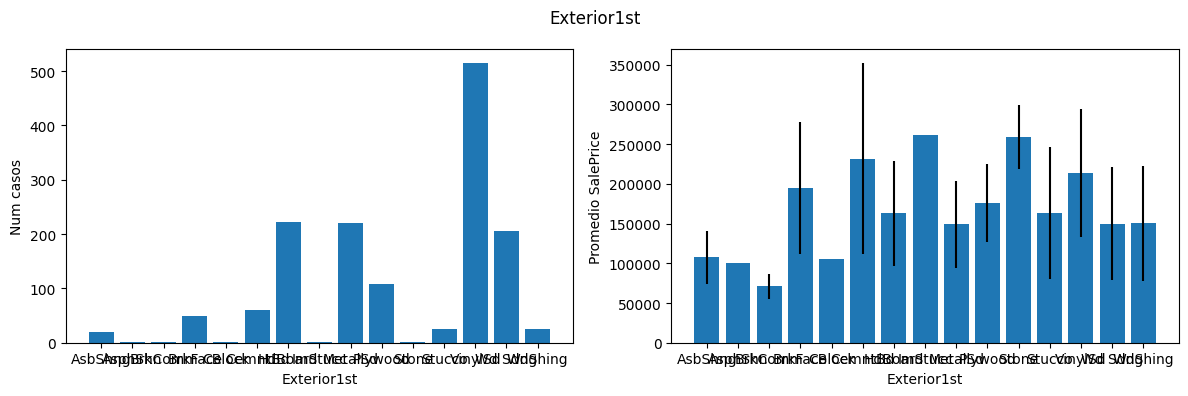





Variable: Exterior2nd
n: 1460 de 1460 (100.00%)
test aplicado: ANOVA
Estadístico F: 17.5008 (p-val=0.0000)


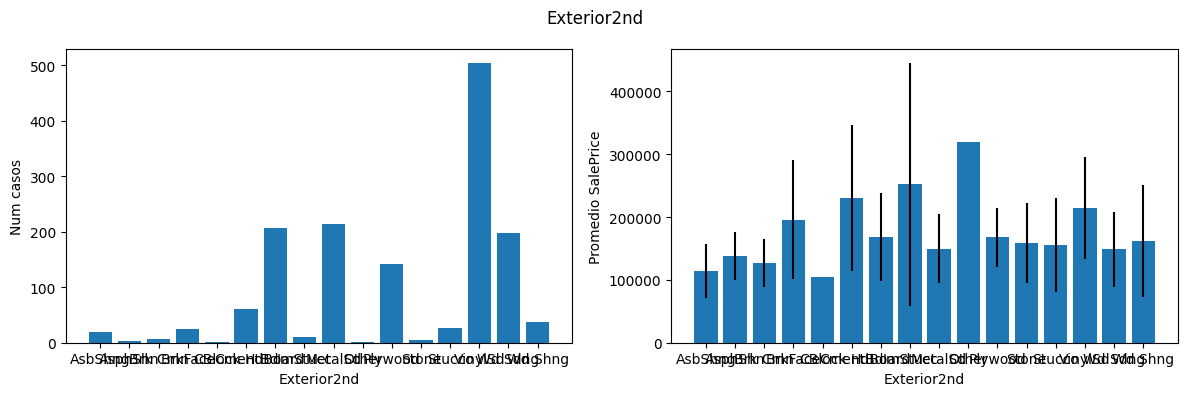





Variable: MasVnrType
n: 1452 de 1460 (99.45%)
test aplicado: ANOVA
Estadístico F: 111.6724 (p-val=0.0000)


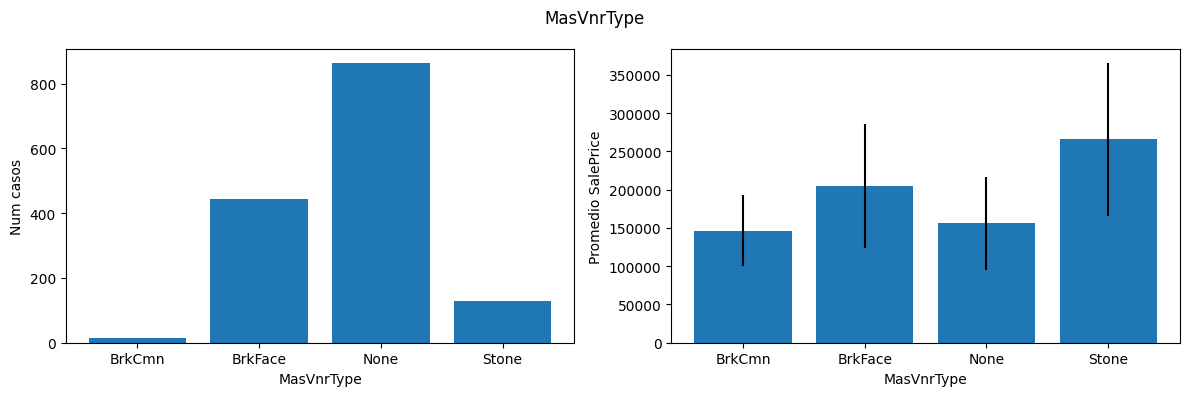





Variable: ExterQual
n: 1460 de 1460 (100.00%)
test aplicado: ANOVA
Estadístico F: 443.3348 (p-val=0.0000)


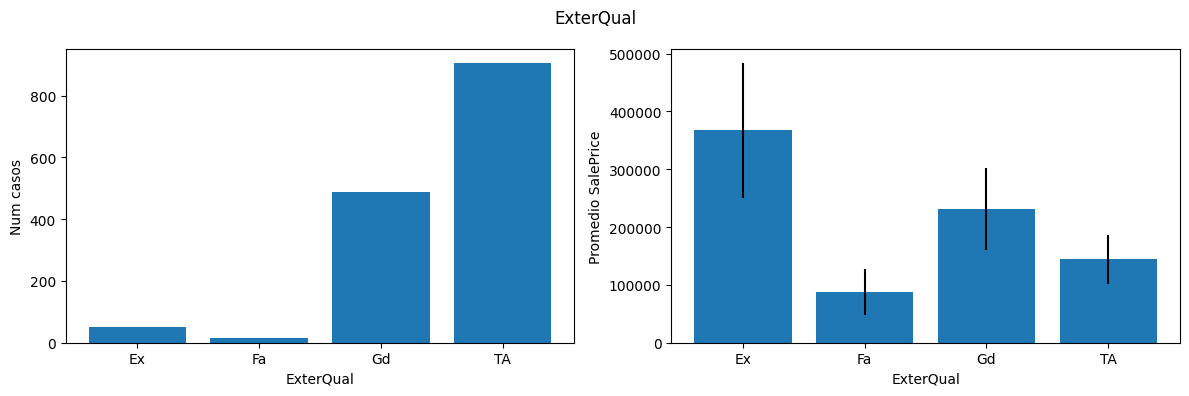





Variable: ExterCond
n: 1460 de 1460 (100.00%)
test aplicado: ANOVA
Estadístico F: 8.7987 (p-val=0.0000)


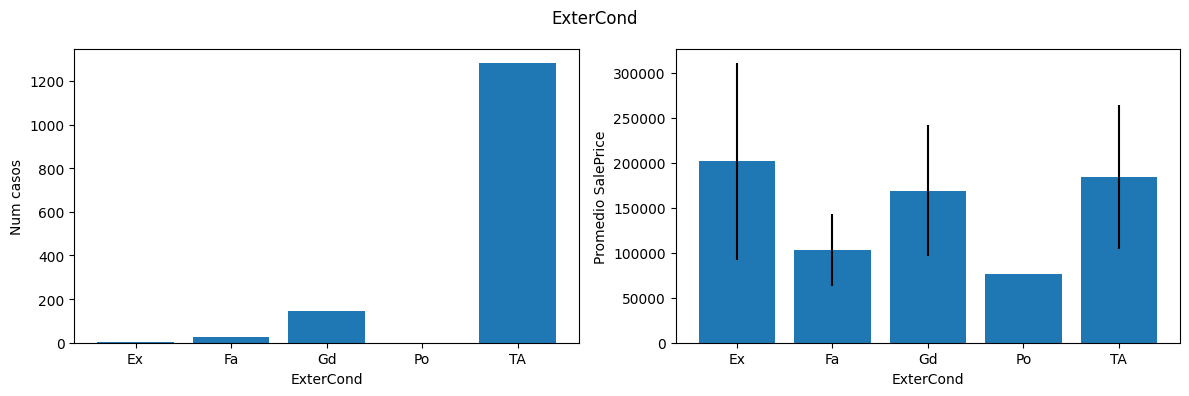





Variable: Foundation
n: 1460 de 1460 (100.00%)
test aplicado: ANOVA
Estadístico F: 100.2539 (p-val=0.0000)


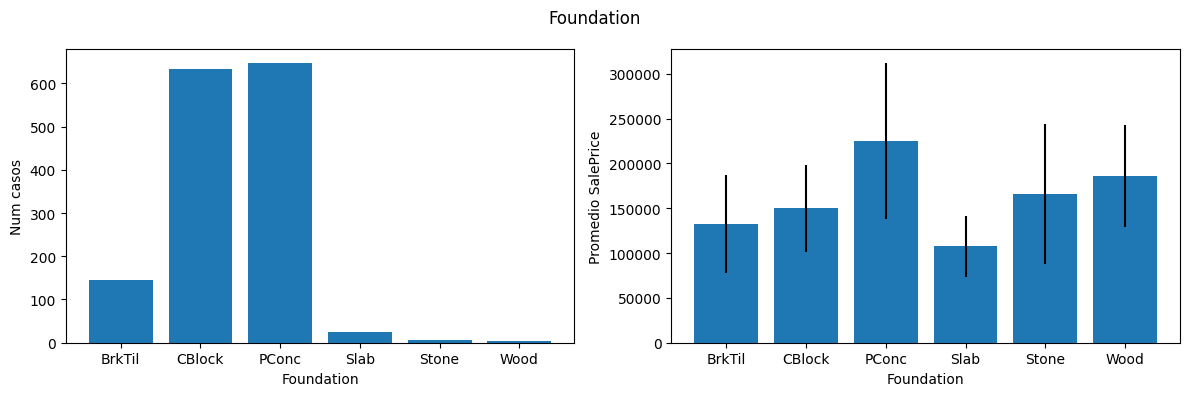





Variable: BsmtQual
n: 1423 de 1460 (97.47%)
test aplicado: ANOVA
Estadístico F: 392.9135 (p-val=0.0000)


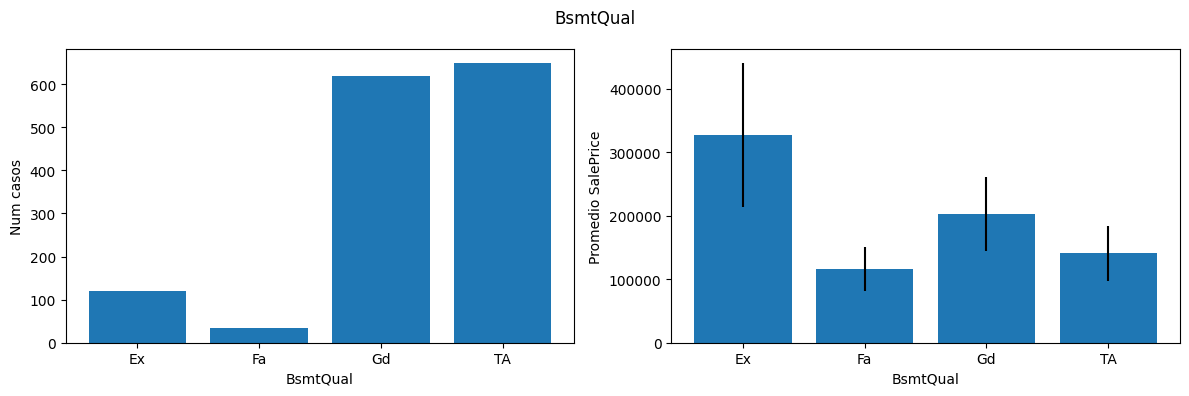





Variable: BsmtCond
n: 1423 de 1460 (97.47%)
test aplicado: ANOVA
Estadístico F: 14.0306 (p-val=0.0000)


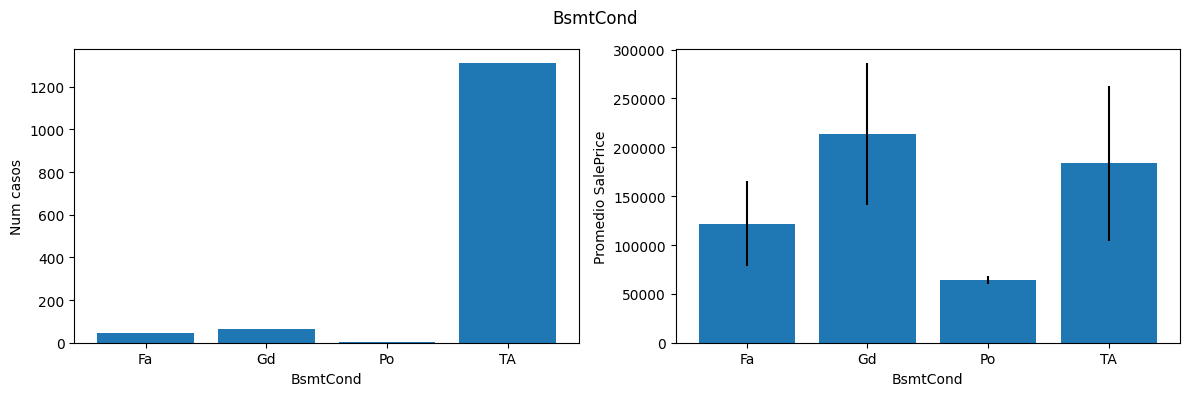





Variable: BsmtExposure
n: 1422 de 1460 (97.40%)
test aplicado: ANOVA
Estadístico F: 70.8880 (p-val=0.0000)


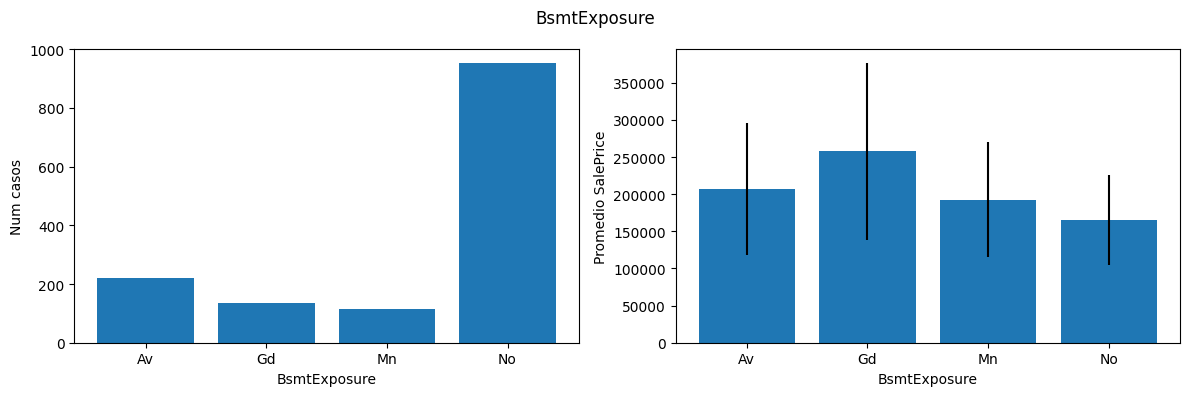





Variable: BsmtFinType1
n: 1423 de 1460 (97.47%)
test aplicado: ANOVA
Estadístico F: 67.6022 (p-val=0.0000)


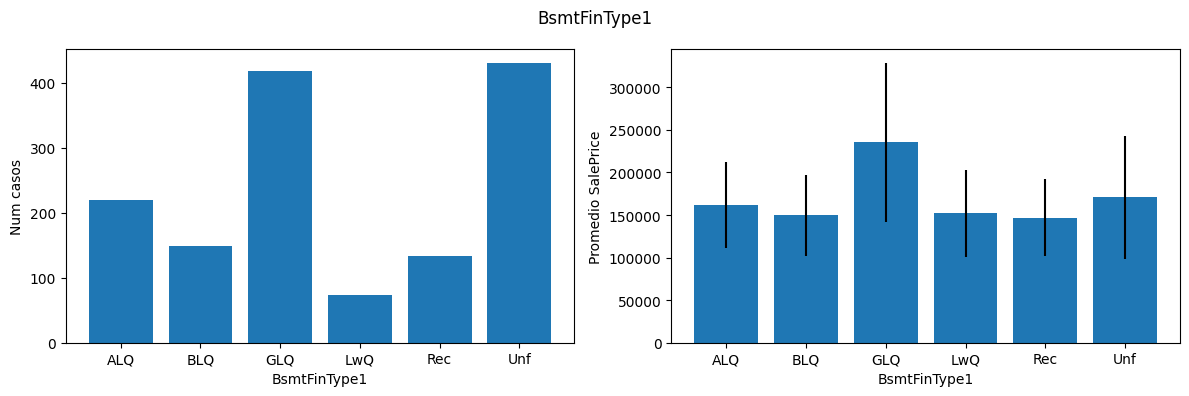





Variable: BsmtFinType2
n: 1422 de 1460 (97.40%)
test aplicado: ANOVA
Estadístico F: 2.7025 (p-val=0.0194)


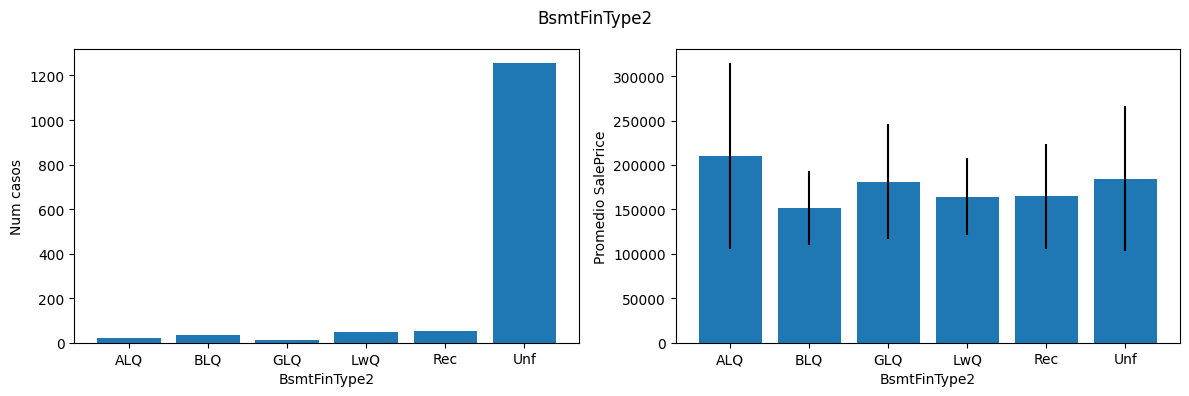





Variable: Heating
n: 1460 de 1460 (100.00%)
test aplicado: ANOVA
Estadístico F: 4.2598 (p-val=0.0008)


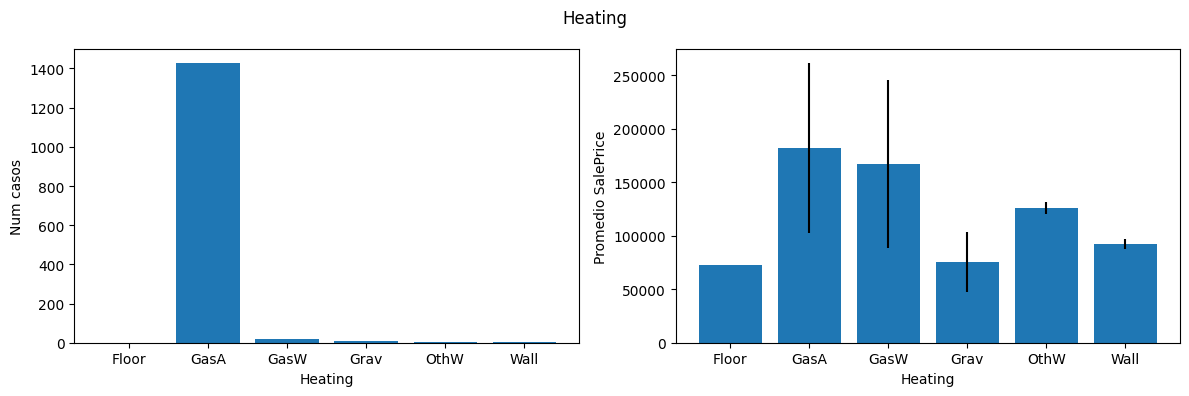





Variable: HeatingQC
n: 1460 de 1460 (100.00%)
test aplicado: ANOVA
Estadístico F: 88.3945 (p-val=0.0000)


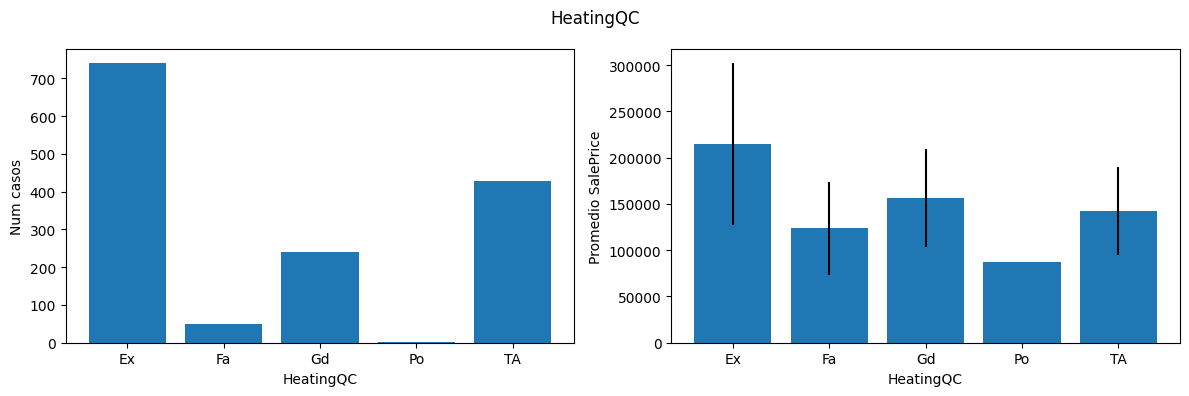





Variable: CentralAir
n: 1460 de 1460 (100.00%)
test aplicado: two-sample t-test
Estadístico T: 9.9149 (p-val=0.0000)


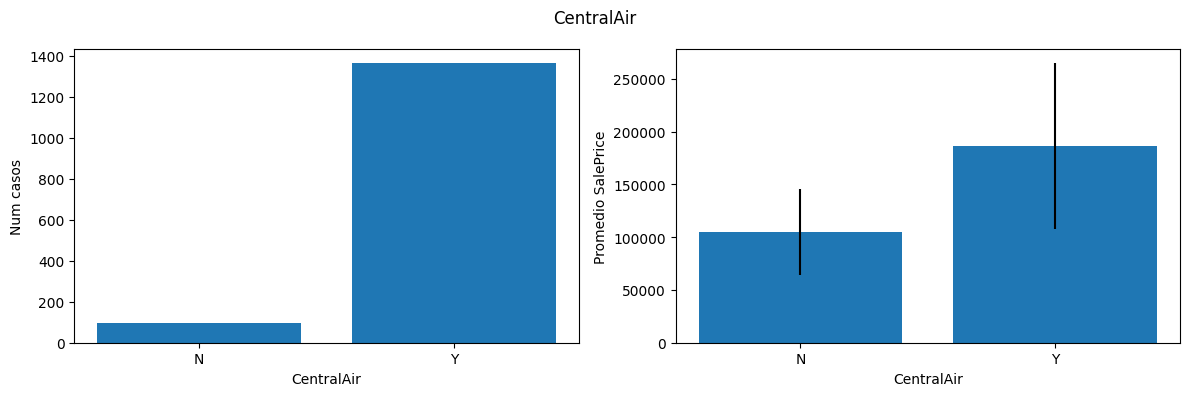





Variable: Electrical
n: 1459 de 1460 (99.93%)
test aplicado: ANOVA
Estadístico F: 23.0677 (p-val=0.0000)


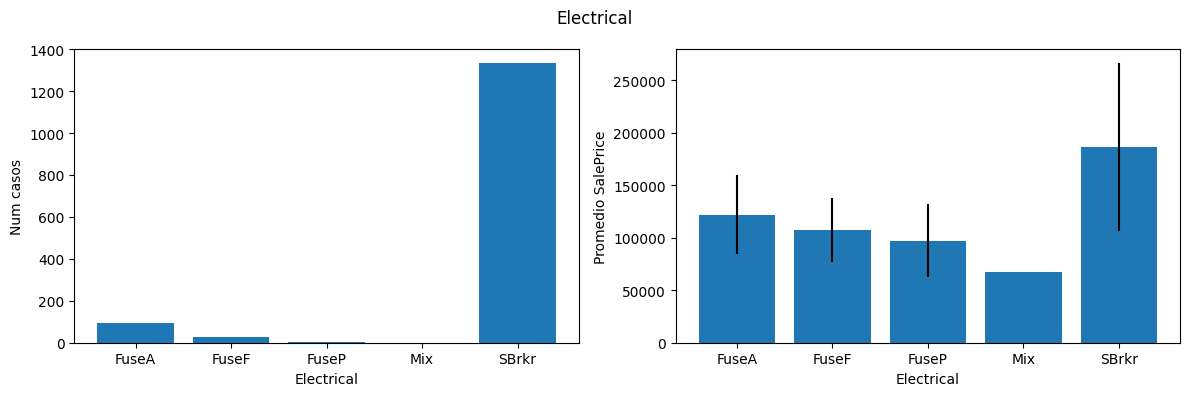





Variable: KitchenQual
n: 1460 de 1460 (100.00%)
test aplicado: ANOVA
Estadístico F: 407.8064 (p-val=0.0000)


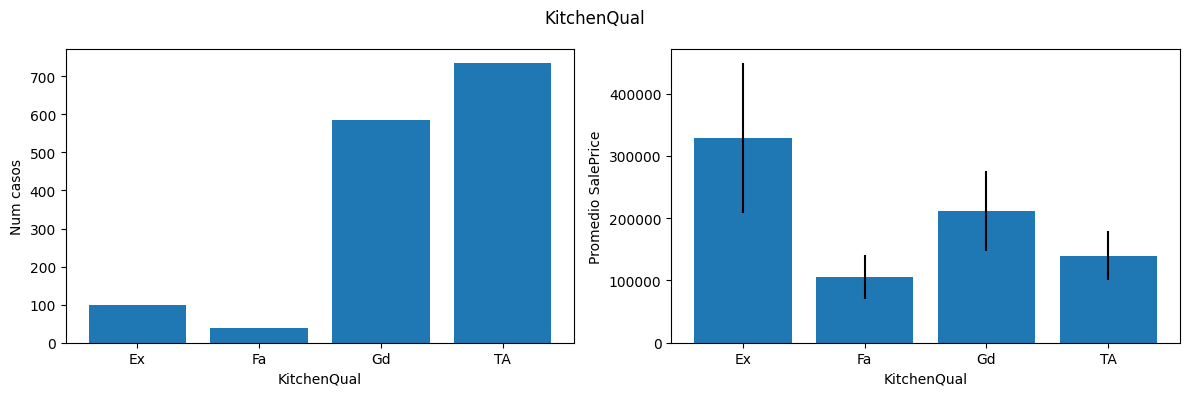





Variable: Functional
n: 1460 de 1460 (100.00%)
test aplicado: ANOVA
Estadístico F: 4.0579 (p-val=0.0005)


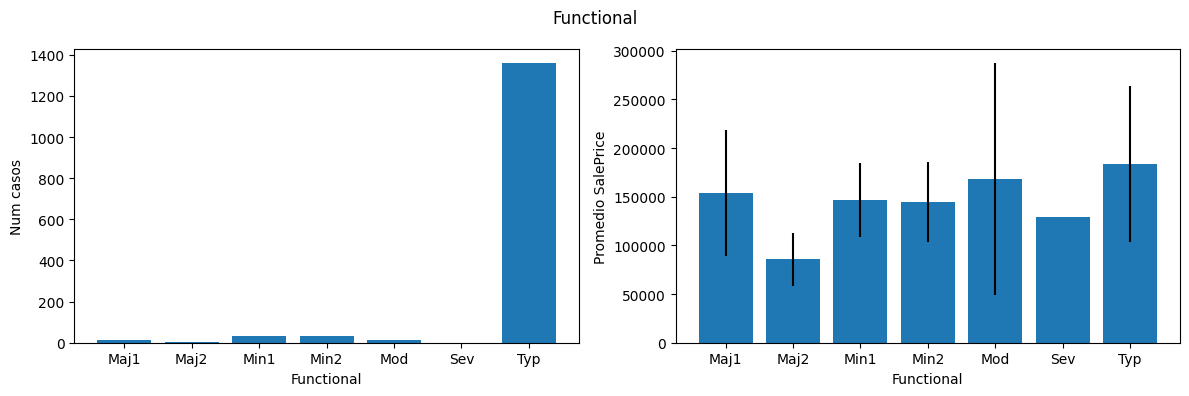





Variable: FireplaceQu
n: 770 de 1460 (52.74%)
test aplicado: ANOVA
Estadístico F: 24.3989 (p-val=0.0000)


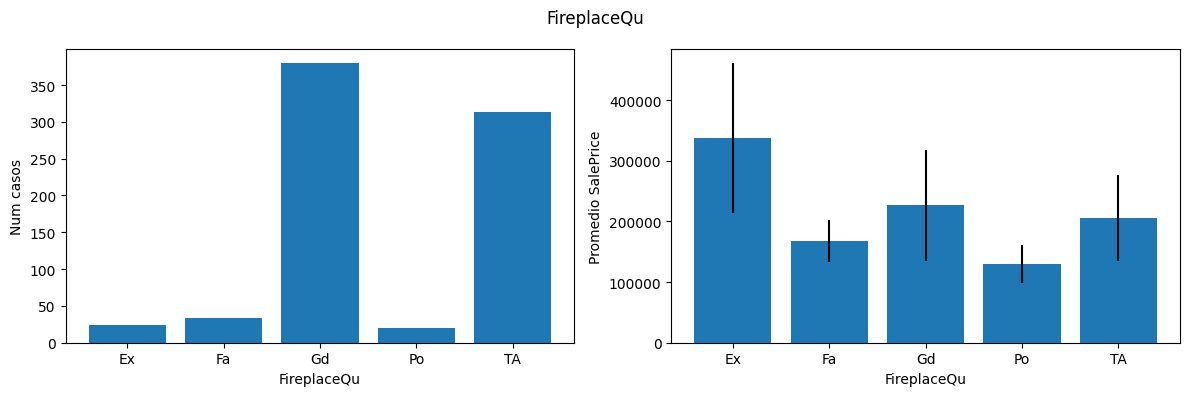





Variable: GarageType
n: 1379 de 1460 (94.45%)
test aplicado: ANOVA
Estadístico F: 71.5221 (p-val=0.0000)


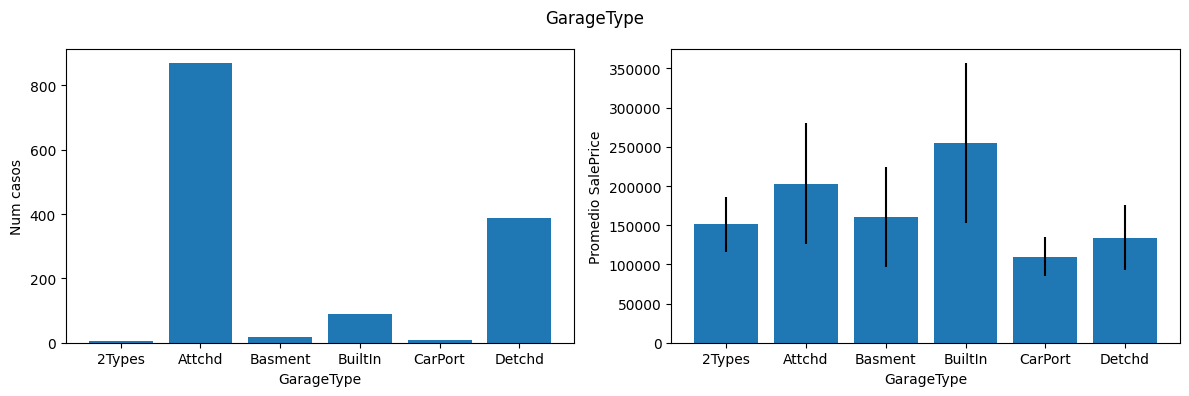





Variable: GarageFinish
n: 1379 de 1460 (94.45%)
test aplicado: ANOVA
Estadístico F: 250.9625 (p-val=0.0000)


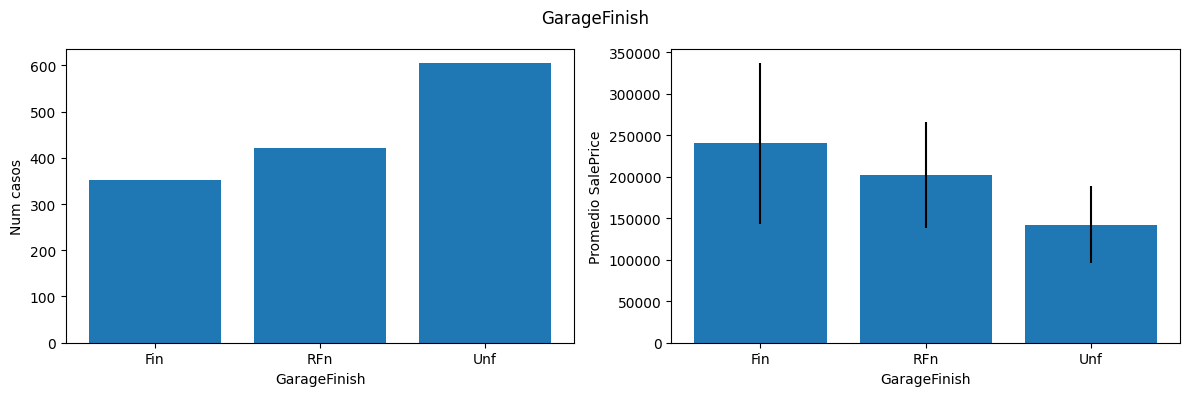





Variable: GarageQual
n: 1379 de 1460 (94.45%)
test aplicado: ANOVA
Estadístico F: 9.5704 (p-val=0.0000)


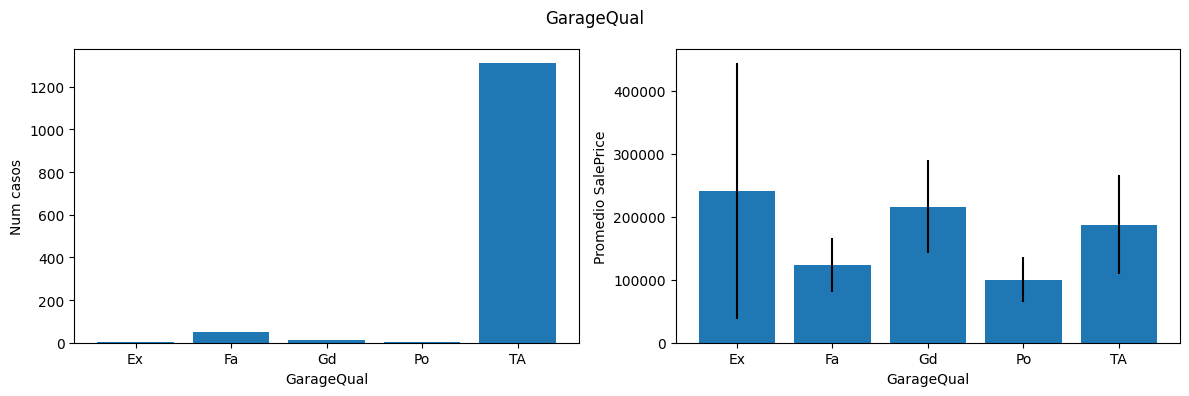





Variable: GarageCond
n: 1379 de 1460 (94.45%)
test aplicado: ANOVA
Estadístico F: 9.5412 (p-val=0.0000)


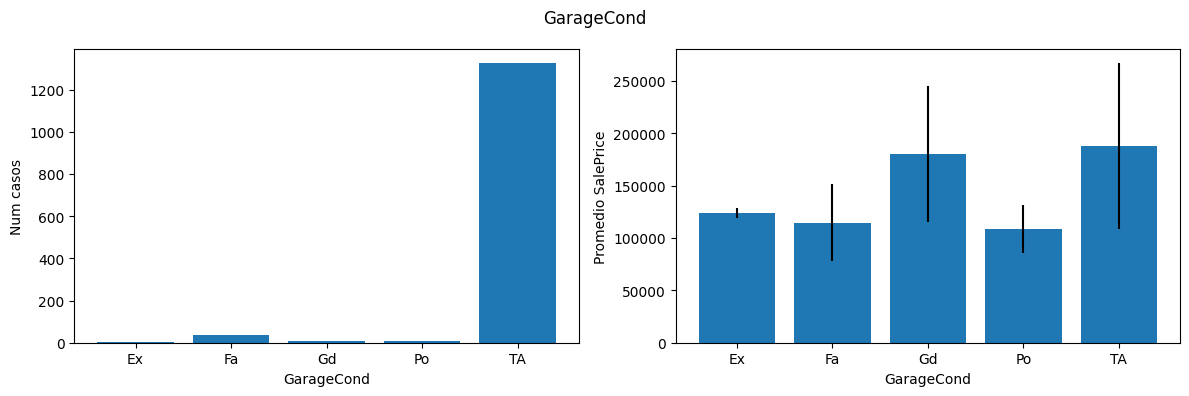





Variable: PavedDrive
n: 1460 de 1460 (100.00%)
test aplicado: ANOVA
Estadístico F: 42.0242 (p-val=0.0000)


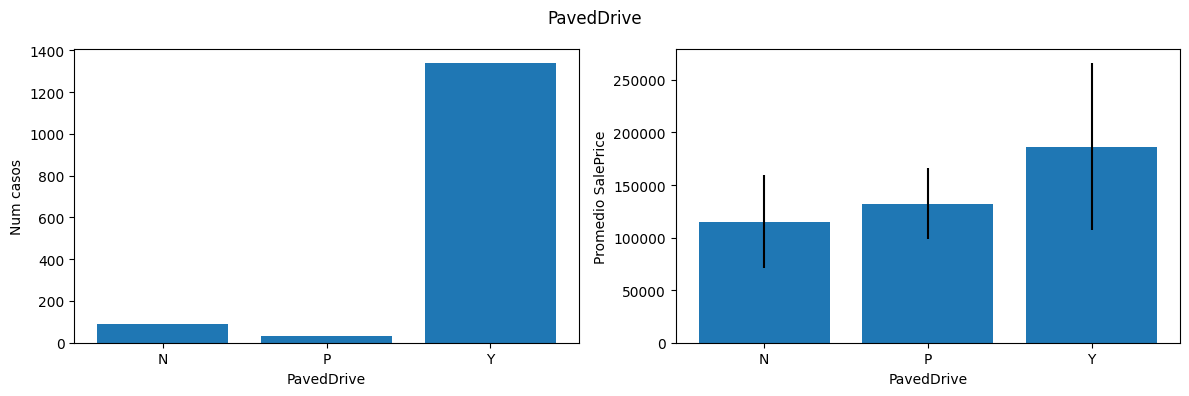





Variable: PoolQC
n: 7 de 1460 (0.48%)
test aplicado: ANOVA
Estadístico F: 1.6275 (p-val=0.3040)


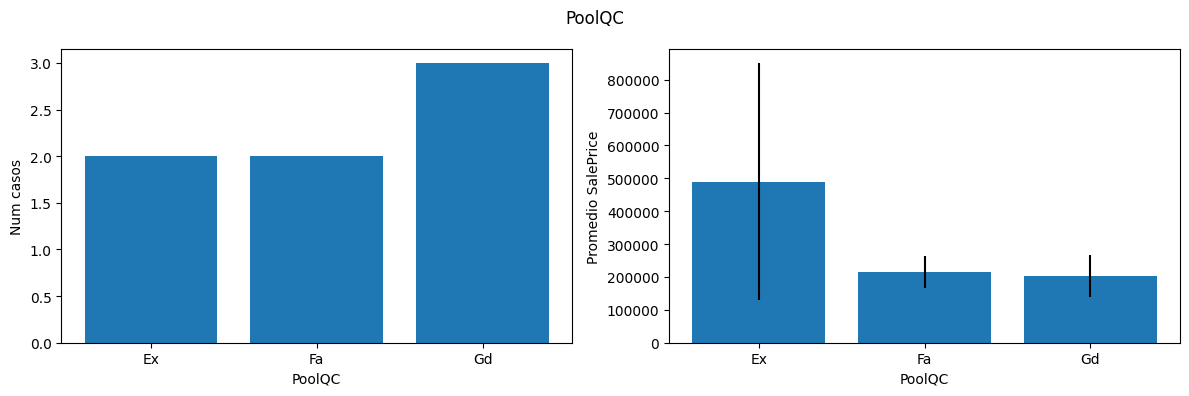





Variable: Fence
n: 281 de 1460 (19.25%)
test aplicado: ANOVA
Estadístico F: 4.9482 (p-val=0.0023)


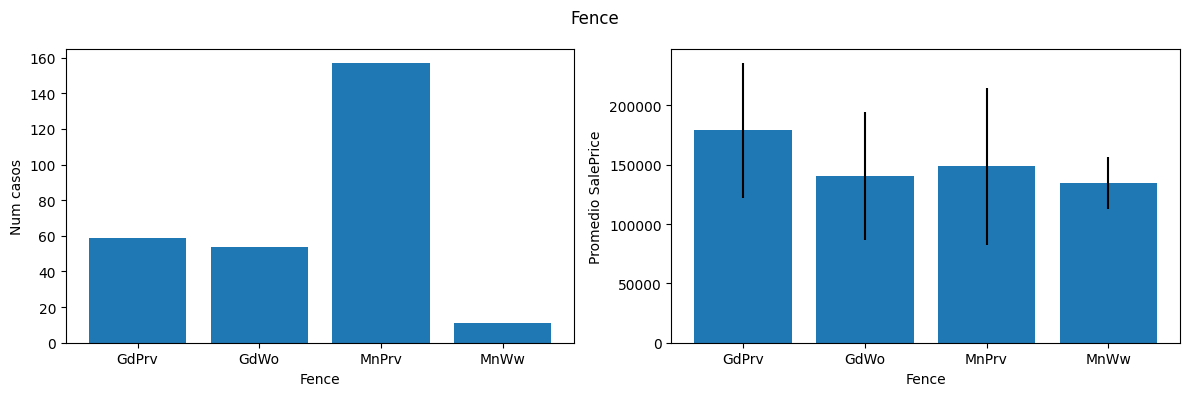





Variable: MiscFeature
n: 54 de 1460 (3.70%)
test aplicado: ANOVA
Estadístico F: 2.1573 (p-val=0.1047)


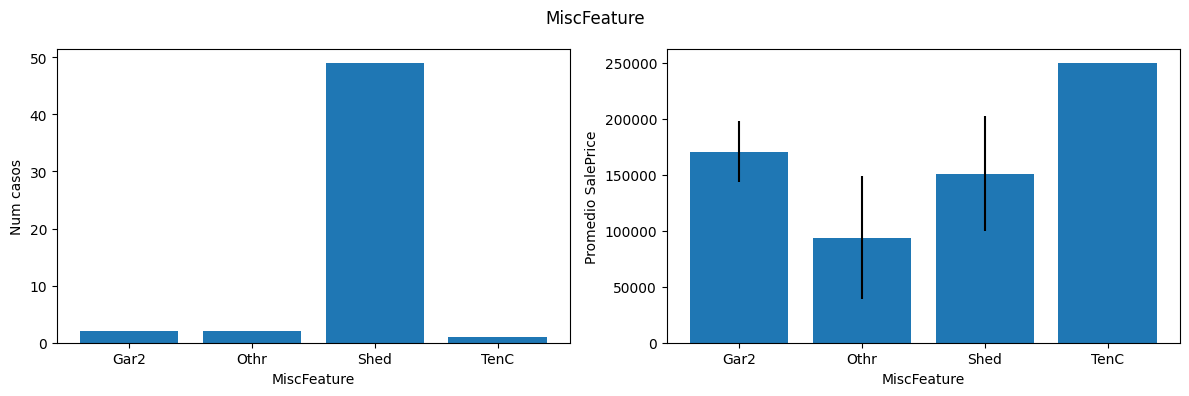





Variable: SaleType
n: 1460 de 1460 (100.00%)
test aplicado: ANOVA
Estadístico F: 28.8631 (p-val=0.0000)


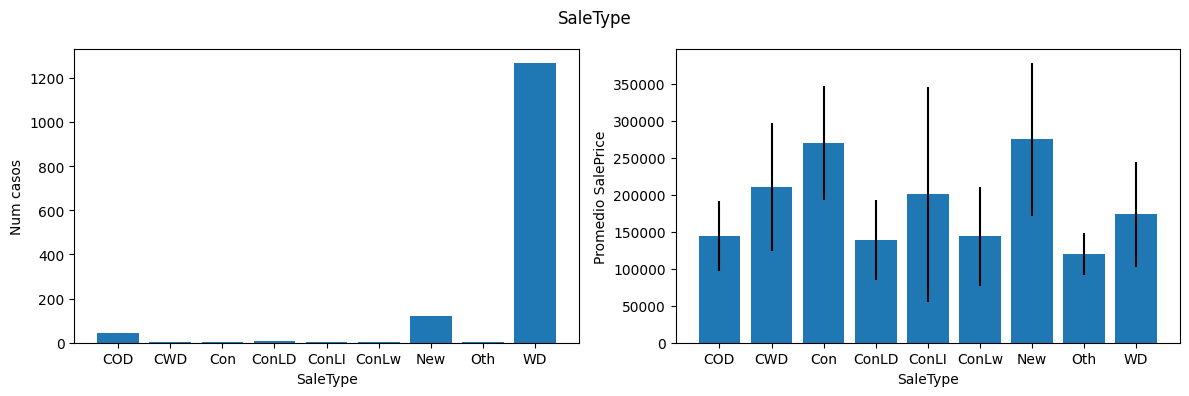





Variable: SaleCondition
n: 1460 de 1460 (100.00%)
test aplicado: ANOVA
Estadístico F: 45.5784 (p-val=0.0000)


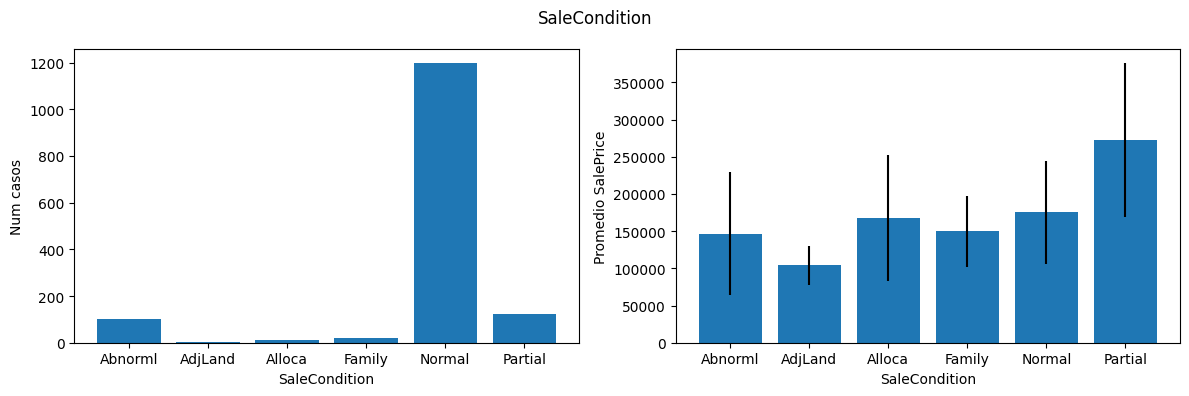

In [ ]:
# Análisis inferencial y representación visual
#----------------------------------------------

# Definición de variable de interacción
resp_col = "SalePrice"

# Iterar para cada variable categórica...
for col in columnas_categoricas:

    # Determinar test a aplicar y ejecutar inferencia usando la función "ejecutar_test_segun_num_cats"
    test, statistic, p_val = ejecutar_test_segun_num_cats(data, col, resp_col)

    # Imprimir datos de inferencia
    num_nonnans = len(data[data[col].notnull()])
    print("\n\n\n")
    print(f"Variable: {col}")
    print(f"n: {num_nonnans} de {len(data)} ({num_nonnans*100/len(data):2.2f}%)")
    print(f"test aplicado: {test}")
    print(f"{statistic} (p-val={p_val:.4f})")

    # Determinar datos en los que centrarnos para visualizar
    aggr_df = data.groupby(col)['SalePrice'].agg(['mean', 'std','count']).drop("nan", errors='ignore')
    aggr_df["sem"] = aggr_df["std"]/np.sqrt(aggr_df["count"])

    # Determinar datos en los que centrarnos
    recuentos_df = data.groupby(col)['Id'].count()
    promedios_df = data.groupby(col)['SalePrice'].mean()
    desvest_df = data.groupby(col)['SalePrice'].std()

    cats = aggr_df.index.tolist()
    promedios_y = aggr_df["mean"].values.tolist()
    sem_y = aggr_df["sem"].values.tolist()

    # Generar interfaz para dos gráficas
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(col)

    # Dibujar a la izquierda el diagrama de barras con recuentos
    x = recuentos_df.index.tolist()
    h = recuentos_df.values.tolist()
    axs[0].bar(x, h)
    axs[0].set_xlabel(col)
    axs[0].set_ylabel('Num casos')

    # Dibujar a la derecha el diagrama de barras con interacción entre categorías y promedio de respuesta
    x = promedios_df.index.tolist()
    h = promedios_df.values.tolist()
    err = desvest_df.values.tolist()
    axs[1].bar(x, h, yerr=err)
    axs[1].set_xlabel(col)
    axs[1].set_ylabel(f"Promedio {resp_col}")

    # Mostrar visualización
    fig.tight_layout()
    fig.subplots_adjust(top=0.88)
    plt.show()



    # # Generar interfaz para gráfica
    # plt.figure()
    # plt.title(col)

    # # Dibujar a la derecha el diagrama de barras con interacción entre categorías y promedio de respuesta
    # plt.bar(cats, promedios_y, yerr=sem_y)
    # plt.xlabel(col)
    # plt.ylabel(f"Promedio {resp_col}")

    # # Mostrar visualización
    # plt.show()

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Correlación entre variables

In [ ]:
#vemos correlación entre variables
data.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

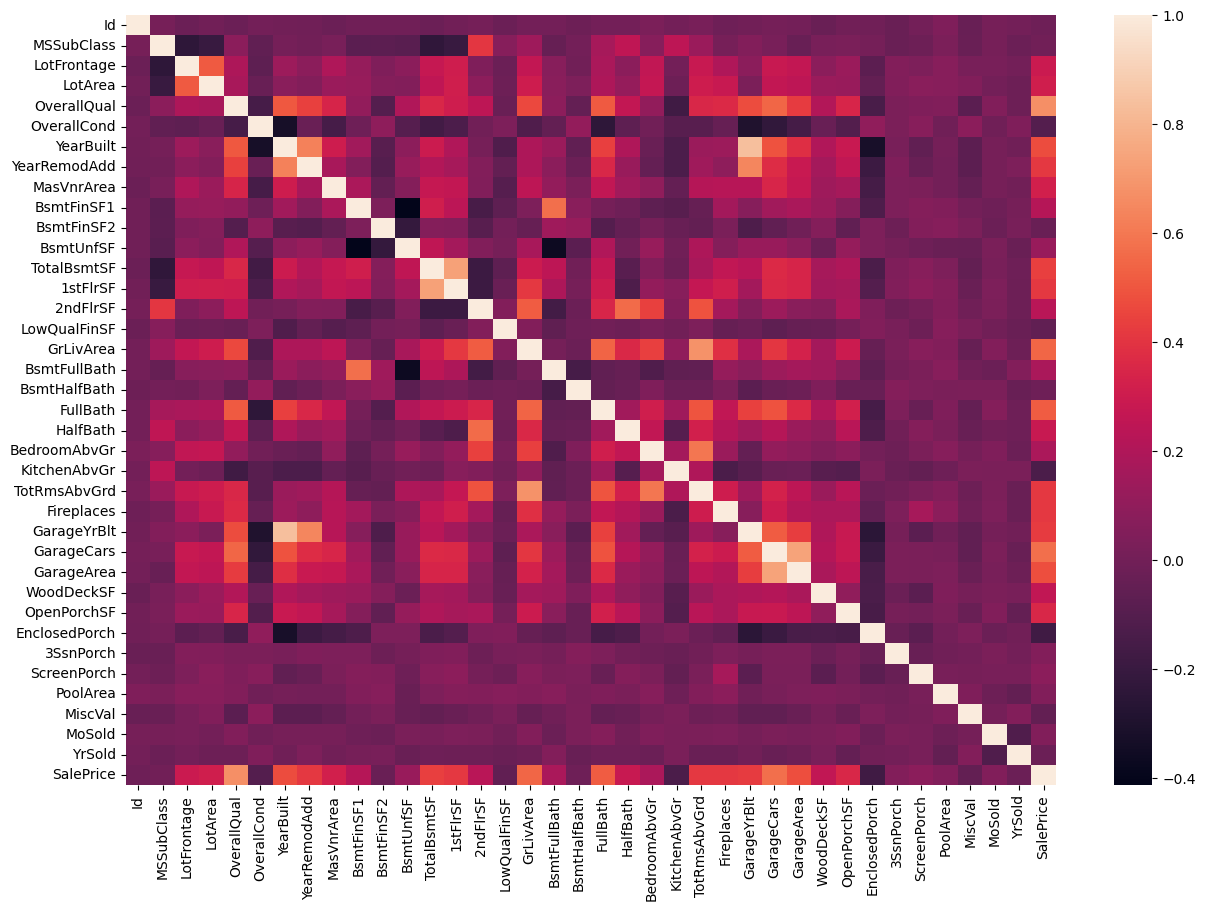

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
sns.heatmap(data.corr(method='kendall'), ax=ax);



```
# Tiene formato de código
```

# Procesado de datos

## Eliminar outliers

In [ ]:
# TO DO - ¿Esto sería adecuado o no se va a notar?

# Voy a eliminar las filas con valores de SalePrice menores que el 1% y mayores que el 99%
# Define el percentil inferior y superior para identificar outliers (por ejemplo, 1% y 99%)
percentile_lower = 3
percentile_upper = 90

# Calcula los percentiles de la columna 'SalePrice'
lower_bound = data['SalePrice'].quantile(percentile_lower / 100)
upper_bound = data['SalePrice'].quantile(percentile_upper / 100)
print (lower_bound)
print (upper_bound)

# Identificamos filas con outliers en el valor SalePrice
indice_outliers_low = np.where(data['SalePrice'] < lower_bound)
print (indice_outliers_low[0])

indice_outliers_up = np.where(data['SalePrice'] > upper_bound)
print (indice_outliers_up[0])

# Eliminamos filas con outliers
processed_data = data.drop(np.concatenate([indice_outliers_low[0], indice_outliers_up[0]]))

len(processed_data)

NameError: ignored

## Transformación de datos

Por sugerencia del tutor, debido a que la variable objetivo tiene sesgo, entrenaremos y predeciremos con su logaritmo. Después haremos la exponencial para obtener el valor real de la predicción

In [ ]:
data['SalePrice'] = np.log(data['SalePrice'])

## Eliminación de variables

In [ ]:
# El ID no aporta nada a la predicción
# Quito otras variables porque no muestran una influencia clara sobre el precio de venta (ver diagrama de barras, que muestra una desviación estándar muy alta para todas las categorías)
# Viendo la tabla de correlación entre variables, observamos que hay una gran correlación entre los siguientes pares de variables (lo cual tiene bastante sentido):
# GarageArea y GarageCars
# YearBuilt y GarageYrBlt
# por lo que voy a eliminar la segunda variable de cada par
processed_data = data.drop(['Id', 'SaleCondition' ,'SaleType', 'BsmtFinType2', 'BsmtFinType1', 'RoofMatl', 'RoofStyle', 'LotShape', 'GarageCars', 'GarageYrBlt'], axis=1 )
processed_test_data = test_data.drop(['Id', 'SaleCondition' ,'SaleType', 'BsmtFinType2', 'BsmtFinType1', 'RoofMatl', 'RoofStyle', 'LotShape', 'GarageCars', 'GarageYrBlt'], axis=1 )


## Rellenar NAs

In [ ]:
lot_frontage_ratio = pd.DataFrame(data['LotArea']/data['LotFrontage']).mean()
processed_data['LotFrontage'] = data['LotFrontage'].fillna( data['LotArea']/lot_frontage_ratio[0] )
processed_data['MasVnrType'] = data['MasVnrType'].fillna('None')
processed_data['Exterior1st'] = data['Exterior1st'].fillna('Other')
processed_data['Exterior2nd'] = data['Exterior2nd'].fillna('Other')

processed_test_data['LotFrontage'] = test_data['LotFrontage'].fillna( test_data['LotArea']/lot_frontage_ratio )
processed_test_data['MasVnrType'] = test_data['MasVnrType'].fillna('None')
processed_test_data['Exterior1st'] = test_data['Exterior1st'].fillna('Other')
processed_test_data['Exterior2nd'] = test_data['Exterior2nd'].fillna('Other')


processed_data["Fence"] = processed_data["Fence"].fillna(0)
processed_data["PavedDrive"] = processed_data["PavedDrive"].fillna(0)
processed_data["GarageFinish"] = processed_data["GarageFinish"].fillna(0)

processed_test_data["Fence"] = processed_test_data["Fence"].fillna(0)
processed_test_data["PavedDrive"] = processed_test_data["PavedDrive"].fillna(0)
processed_test_data["GarageFinish"] = processed_test_data["GarageFinish"].fillna(0)

## Transformación de variables categóricas

### Codificado

In [ ]:
# Función para convertir los grados de calidad en una escala numérica
def nivel_numerico_de_calidad(df, col_name, fill_value = 0):
  values_map = {
      col_name:     {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
  }
  df = df.replace(values_map)
  df[col_name] = df[col_name].fillna(fill_value)

  return df

In [ ]:
# Aplicamos la función anterior a todas las dimensiones que se miden en grados de calidad
quality_fields = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
for f in quality_fields:
  processed_data = nivel_numerico_de_calidad(processed_data, f)
  processed_test_data = nivel_numerico_de_calidad(processed_test_data, f)

In [ ]:
processed_data.head()

In [ ]:
processed_test_data.head()

In [ ]:
# Convertimos a escala numérica otras dimensiones categóricas
cleanup_nums = {
    "Fence":          {"MnPrv": 1, "GdPrv": 3, "GdWo": 4, "MnWw": 2},
    "PavedDrive":     {"N": 1, "P": 2, "Y": 3},
    "GarageFinish":   {"Unf": 1, "RFn": 2, "Fin": 3},
    "Functional":     {"Sal": 1, "Sev": 2, "Maj2": 3, "Maj1": 4, "Mod": 5, "Min2": 6, "Min1": 7, "Typ": 8},
    "Electrical":     {"Mix": 1, "FuseP": 2, "FuseF": 3, "FuseA": 4, "SBrkr": 5},
    "CentralAir":     {"N": 0, "Y": 1},
    "BsmtExposure":   {"No": 1, "Mn": 2, "Av": 3, "Gd": 4},
    "LandSlope":      {"Gtl": 1, "Mod": 2, "Sev": 3},
    "Street":         {"Pave": 1, "Grvl": 2},
    "MSZoning":       {"C (all)": 1, "FV": 2, "RH": 3, "RL": 4, "RM": 5}
}

processed_data = processed_data.replace(cleanup_nums)
processed_test_data = processed_test_data.replace(cleanup_nums)

top_heating = data['Heating'].value_counts().nlargest(1).index
processed_data.loc[~data['Heating'].isin(top_heating), 'Heating'] = 'Other'
test_top_heating = test_data['Heating'].value_counts().nlargest(1).index
processed_test_data.loc[~data['Heating'].isin(test_top_heating), 'Heating'] = 'Other'

processed_data[['Alley', 'Heating']] = data[['Alley', 'Heating']].apply(lambda x: pd.factorize(x)[0])
processed_test_data[['Alley', 'Heating']] = test_data[['Alley', 'Heating']].apply(lambda x: pd.factorize(x)[0])

### One hot encoding

In [ ]:
# Hacemos un One Hot Encoding, pero en lugar de "0" o "1" usamos "0" o el valor de la columna adyacente "MiscVal" que tiene un valor numérico relacionado, parece un valor de superficie o de precio.
encoded_misc_features = data['MiscFeature'].str.get_dummies().mul(data['MiscVal'],axis=0).groupby(level=0).sum()
processed_data = processed_data.drop(['MiscFeature', 'MiscVal'], axis=1)
processed_data = processed_data.join(encoded_misc_features)

encoded_test_misc_features = processed_test_data['MiscFeature'].str.get_dummies().mul(processed_test_data['MiscVal'],axis=0).groupby(level=0).sum()
processed_test_data = processed_test_data.drop(['MiscFeature', 'MiscVal'], axis=1)
processed_test_data = processed_test_data.join(encoded_test_misc_features)
# Añadimos la columna TenC a mano con todo ceros porque en los datos de test no hay ninguna vivienda que tenga esa feature y no se genera la columna
processed_test_data['TenC'] = 0

In [ ]:
processed_data.head()

In [ ]:
processed_test_data.head()

### Target encoding

In [ ]:
# Target Encoding

target_encode_columns = ['GarageType', 'Foundation', 'MasVnrType', 'Exterior1st', 'Exterior2nd', 'HouseStyle', 'BldgType', 'Condition1', 'Condition2', 'Neighborhood', 'LotConfig', 'Utilities', 'LandContour']
target = ['SalePrice']
target_name = target[0]

for embed_col in target_encode_columns:
  val_map = processed_data.groupby(embed_col)[target].mean().to_dict()[target_name]
  processed_data[embed_col] = processed_data[embed_col].map(val_map).values
  processed_test_data[embed_col] = processed_test_data[embed_col].map(val_map).values
  # TO DO: podría haber valores nuevos en el conjunto de test que no se hayan mapeado
  # TO DO: comprobarlo y, si los hay, decidir con qué valor se rellenan (media de todas las viviendas por ejemplo)

In [ ]:
processed_data.head()

In [ ]:
processed_test_data.head()

In [ ]:
processed_data.info()

In [ ]:
# Todas las variables son float64 e int64

# **Separación de variables**

Tratamos por separado las columnas que harán como predictores y la variable objetivo en X e y.

In [ ]:
X = processed_data.drop(columns=["SalePrice"], inplace=False)
y = processed_data.SalePrice
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=None, random_state=0)

# **Validación cruzada**

Utilizaremos validación cruzada para ajustar nuestros modelos. Es por esto que creamos shuffle_split, que es el objeto que necesitamos utilizar para hacer la validación cruzada. Este objeto contiene 5 copias (porque usamos n_splits=5) de nuestro conjunto de entrenamiento, generando en cada una de ellas una división entre lo que se usará para entrenar y lo que se usará para validar.
















In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn import linear_model

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Dividimos los datos de entrenamiento en 5 partes
shuffle_split = ShuffleSplit(n_splits=5, random_state=0)

# **XG Boost**

Pasamos a considerar el XGBoost. Empezamos por definir la malla de hiperparámetros. Si bien ya los vimos en el problema de clasificación, los volvemos a introducir aquí:



*   "n_estimators" es el número de árboles.
*   "max_depth" es la profunidad de los árboles.
*   "learning_rate" nos da una medida de lo grande que es la corrección que van introduciendo los nuevos árboles: a mayor "learning_rate", más grande es la corrección que introduce un nuevo árbol.
*   "objective" es la métrica que utilizaremos para encontrar el modelo. Usamos "reg:squarederror".
*   "tree_method" es la técnica que utilizamos para encontrar las mejores divisiones. Los posibles valores son "exact", que toma todas las divisiones y se queda la mejor, "approx", que considera ciertos percentiles de las variables a la hora de hacer las divisiones y "hist", que, sin entrar demasiado en detalle, hace las divisiones teniendo en cuenta los histogramas de las variables. Nos quedamos aquí con "hist" y "approx".
*   "subsample" es el ratio de filas que considera el algoritmo para cada árbol.
*   "colsample_bytree" es el ratio de columnas que considera el algoritmo para cada árbol.

In [ ]:
# dict_params = {"n_estimators": [200, 250, 300],
#               "max_depth": [15, 20, 25],
#               "learning_rate": [0.03, 0.06],
#               "objective": ["reg:squarederror"],
#               "tree_method": ["hist"],
#               "subsample": [0.6],
#              }

In [ ]:
dict_params = {"n_estimators": [300],
                "max_depth": [20],
                "learning_rate": [0.03],
                "objective": ["reg:squarederror"],
                "tree_method": ["hist"],
                "subsample": [0.6],
               }

In [ ]:
#Volvemos a definir el objeto para entrenar mediante validación cruzada con búsqueda en malla de hiperparámetros. Elegimos validar con el error cuadrático medio:

from sklearn.model_selection import GridSearchCV
model_XGB = GridSearchCV(estimator=XGBRegressor(random_state=42997296),
                         param_grid=dict_params,
                         cv=shuffle_split,
                         refit=True,
                         verbose=1,
                         n_jobs=-1,
                         return_train_score=True,
                         scoring="neg_mean_squared_error"
                         )

## **ENTRENAMOS**

In [ ]:
model_XGB.fit(X_train, y_train)
print(model_XGB.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'learning_rate': 0.03, 'max_depth': 20, 'n_estimators': 300, 'objective': 'reg:squarederror', 'subsample': 0.6, 'tree_method': 'hist'}


In [ ]:
# Los mejores hiperparámetros son:
# {'learning_rate': 0.03, 'max_depth': 20, 'n_estimators': 300, 'objective': 'reg:squarederror', 'subsample': 0.6, 'tree_method': 'hist'}

{'learning_rate': 0.03, 'max_depth': 20, 'n_estimators': 300, 'objective': 'reg:squarederror', 'subsample': 0.6, 'tree_method': 'hist'}


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

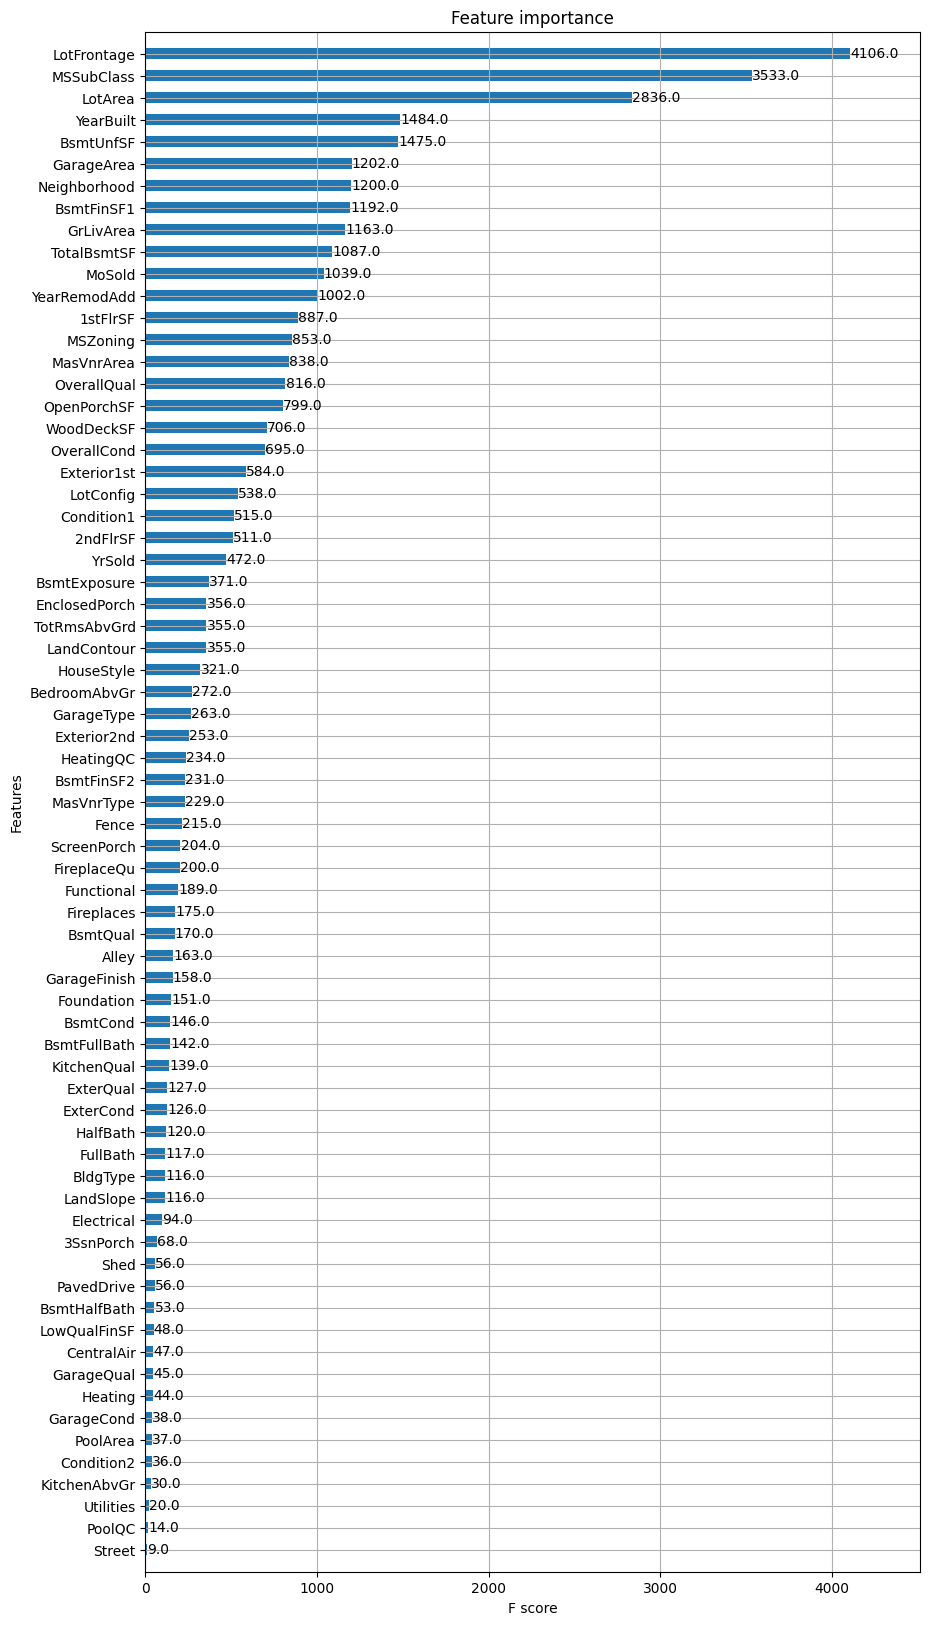

In [ ]:
from xgboost import plot_importance

plt.rcParams['figure.figsize'] = (10, 20)
plot_importance(model_XGB.best_estimator_, height=.5)

# TO DO - Decidir si se elimina alguna columna según su importancia

## Guardamos el mejor modelo XGB

In [ ]:
best_model = model_XGB.best_estimator_
best_model.save_model( os.path.join(rootdir, 'xgboost_gridsearch_best_model.txt') )

Cargamos el modelo

In [ ]:
# model_XGB = xgb.Booster()
# model_XGB.load_model( os.path.join(rootdir, 'xgboost_gridsearch_best_model.txt') )

# Predicción

### Con datos de entrenamiento

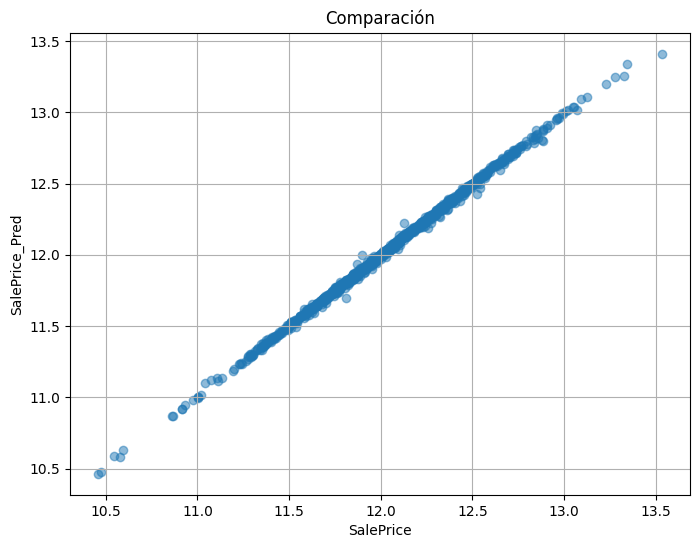

In [ ]:
# Análisis de resultados en el conjunto de entrenamiento:

y_train_preds_xgb = model_XGB.predict(X_train)

plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_preds_xgb, alpha=0.5)  # Crear el gráfico de dispersión

# Personalizar el gráfico
plt.xlabel('SalePrice')
plt.ylabel('SalePrice_Pred')
plt.title('Comparación')

# Mostrar el gráfico
plt.grid(True)
plt.show()

### Con datos de validación

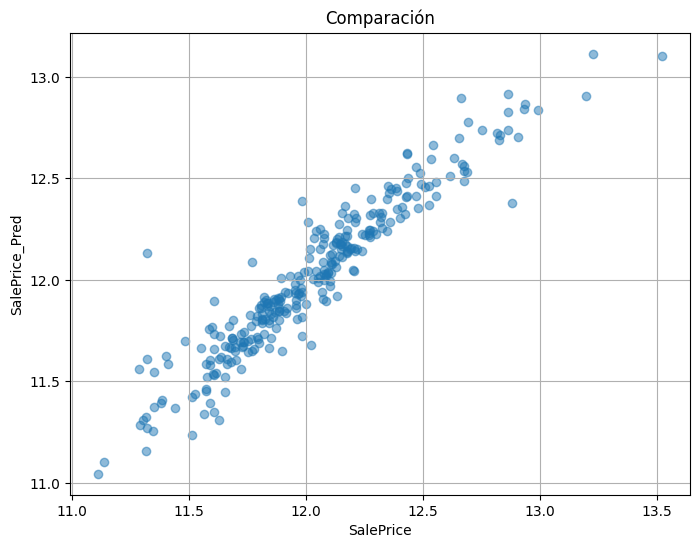

In [ ]:
# Análisis de resultados en el conjunto de test:

y_test_preds_xgb = model_XGB.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_preds_xgb, alpha=0.5)  # Crear el gráfico de dispersión

# Personalizar el gráfico
plt.xlabel('SalePrice')
plt.ylabel('SalePrice_Pred')
plt.title('Comparación')

# Mostrar el gráfico
plt.grid(True)
plt.show()

### Con datos de test

In [ ]:
preds = model_XGB.predict(processed_test_data)
preds = np.exp(preds)
preds

array([124750.23, 161052.52, 186203.92, ..., 164282.72, 104076.87,
       201030.16], dtype=float32)

In [ ]:
# Submission
test_data = pd.read_csv(os.path.join(rootdir, 'test.csv'))
ids = test_data.pop('Id')

output = pd.DataFrame({'Id': ids,
                       'SalePrice': preds})

In [ ]:
from datetime import datetime

now = datetime.now()
dt_string = now.strftime("%Y%m%d_%H%M%S")

output.to_csv( os.path.join(rootdir, 'submission_xgboost_'+dt_string+'_log_y.csv') , index=False)